>#                              **1) Evaluation Project _Baseball Case Study**




###                                         **By: AFSANA BEGAM**
###                                         **Batch: DS2303**

================================================================================================================

## **Problem Statement:**
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

- **Input features:** Runs Scored(R), At Bat(AB), Hit(H), Double(2B), Triple(3B), Home runs(HR), Base on Balls(BB), Strikeout(SO), Stolen Base(SB), Run Average(RA), Earned Run(ER), Earned Run Average (ERA), Shutout(SHO), Save(SV), Complete Game(CG) and Errors(E)

- **Output:** Number of predicted Wins (W)

**To understand the columns meaning, follow the link given below to understand the baseball statistics:**https://en.wikipedia.org/wiki/Baseball_statistics

**For downloading the dataset, use the link given below.**

Downlaod Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

___________________________________________________________________________________

### **Importing required library:**

In [ ]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt # ploting package
%matplotlib inline

# Filtering warnings
import warnings
warnings.filterwarnings('ignore')

### **Data Collection:**

In [ ]:
#Data Collection from csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [ ]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.shape

No of Rows: 30
No of Columns: 17


(30, 17)

In [ ]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

* **Take-away:**

 * This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
  * Input features in this dataset are : Runs Scored(R), At Bat(AB), Hit(H), Double(2B), Triple(3B), Home runs(HR), Base on Balls(BB), Strikeout(SO), Stolen Base(SB), Run Average(RA), Earned Run(ER), Earned Run Average (ERA), Shutout(SHO), Save(SV), Complete Game(CG) and Errors(E)
  * Target features : Number of predicted Wins (W)

In [ ]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**The column names here in our dataset that is not understandable and to decode we have to convert column names into understandable format. In order to understand all the different abbreviation of columns in dataset, I am following baseball stastics terminology from Wikipedia.**
    
*  **Pitching statistics:**
    
    * W – Wins: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
    * RA – Run average: number of runs allowed times nine divided by innings pitched
    * ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    * ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    * CG – Complete game: number of games where player was the only pitcher for their team
    * SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win.
    * SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
    
* **Batting statistics:**
    * R – Runs scored: number of times a player crosses home plate
    * AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction. The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out.
    * H – Hit: reaching base because of a batted, fair ball without error by the defense
    * 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    * 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    * HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    * BB – Base on Balls: hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.
    * SO – Strike out: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.
* **Base running statistics:**
    * SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.
    * R – Run scored: times reached home plate legally and safely
    
* Fielding statistics:
    * E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.
    
<b> Now that we have clear understanding on what the abbreviation actually mean and In order to simplify we are going to rename columns in the dataset.

In [ ]:
df.rename(columns={'W' : 'Wins',
                   'R' : 'Runs Scored',
                  'AB' : 'At Bat',
                   'H' : 'Hit',
                  '2B' : 'Double',
                  '3B' : 'Triple',
                  'HR' : 'Home Runs',
                  'BB' : 'Base on Balls',
                  'SO' : 'Strike Out',
                  'SB' : 'Stolen Base',
                  'RA' : 'Run Average',
                  'ER' : 'Earned Run',
                 'ERA' : 'Earned Run Average',
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Out',
                  'SV' : 'Save',
                   'E' : 'Errors'},
          inplace=True)

df.head()

Wins  Runs Scored  At Bat   Hit  Double  Triple  Home Runs  Base on Balls  \
0    95          724    5575  1497     300      42        139            383   
1    83          696    5467  1349     277      44        156            439   
2    81          669    5439  1395     303      29        141            533   
3    76          622    5533  1381     260      27        136            404   
4    74          689    5605  1515     289      49        151            455   

   Strike Out  Stolen Base  Run Average  Earned Run  Earned Run Average  \
0         973          104          641         601                3.73   
1        1264           70          700         653                4.07   
2        1157           86          640         584                3.67   
3        1231           68          701         643                3.98   
4        1259           83          803         746                4.64   

   Complete Game  Shut Out  Save  Errors  
0              2         8    56      88  
1              2        12    45      86  
2             11        10    38      79  
3              7         9    37     101  
4              7        12    35      86

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hit                 30 non-null     int64  
 4   Double              30 non-null     int64  
 5   Triple              30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Out          30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Run Average         30 non-null     int64  
 11  Earned Run          30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Out            30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Errors    

* **Take-Away:**
    
    * We can see that this dataset has only numeric data and no column has any categorical data.
    * Therefore this dataset falls into regression analysis.

In [ ]:
#Checking Missing values
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hit                   0
Double                0
Triple                0
Home Runs             0
Base on Balls         0
Strike Out            0
Stolen Base           0
Run Average           0
Earned Run            0
Earned Run Average    0
Complete Game         0
Shut Out              0
Save                  0
Errors                0
dtype: int64

<Axes: >

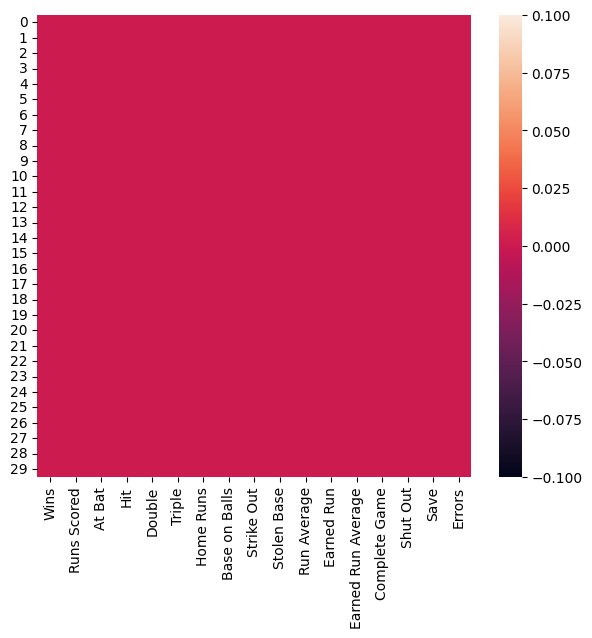

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull())

* **Take-Away:**
 * There is no **null values** present in the dataset

### **Statistical Analysis:**

In [ ]:
df.describe().T

count         mean         std      min        25%  \
Wins                 30.0    80.966667   10.453455    63.00    74.0000   
Runs Scored          30.0   688.233333   58.761754   573.00   651.2500   
At Bat               30.0  5516.266667   70.467372  5385.00  5464.0000   
Hit                  30.0  1403.533333   57.140923  1324.00  1363.0000   
Double               30.0   274.733333   18.095405   236.00   262.2500   
Triple               30.0    31.300000   10.452355    13.00    23.0000   
Home Runs            30.0   163.633333   31.823309   100.00   140.2500   
Base on Balls        30.0   469.100000   57.053725   375.00   428.2500   
Strike Out           30.0  1248.200000  103.759470   973.00  1157.5000   
Stolen Base          30.0    83.500000   22.815225    44.00    69.0000   
Run Average          30.0   688.233333   72.108005   525.00   636.2500   
Earned Run           30.0   635.833333   70.140786   478.00   587.2500   
Earned Run Average   30.0     3.956333    0.454089     2.94     3.6825   
Complete Game        30.0     3.466667    2.763473     0.00     1.0000   
Shut Out             30.0    11.300000    4.120177     4.00     9.0000   
Save                 30.0    43.066667    7.869335    28.00    37.2500   
Errors               30.0    94.333333   13.958889    75.00    86.0000   

                         50%      75%      max  
Wins                  81.000    87.75   100.00  
Runs Scored          689.000   718.25   891.00  
At Bat              5510.000  5570.00  5649.00  
Hit                 1382.500  1451.50  1515.00  
Double               275.500   288.75   308.00  
Triple                31.000    39.00    49.00  
Home Runs            158.500   177.00   232.00  
Base on Balls        473.000   501.25   570.00  
Strike Out          1261.500  1311.50  1518.00  
Stolen Base           83.500    96.50   134.00  
Run Average          695.500   732.50   844.00  
Earned Run           644.500   679.25   799.00  
Earned Run Average     4.025     4.22     5.04  
Complete Game          3.000     5.75    11.00  
Shut Out              12.000    13.00    21.00  
Save                  42.000    46.75    62.00  
Errors                91.000    96.75   126.00

<Axes: >

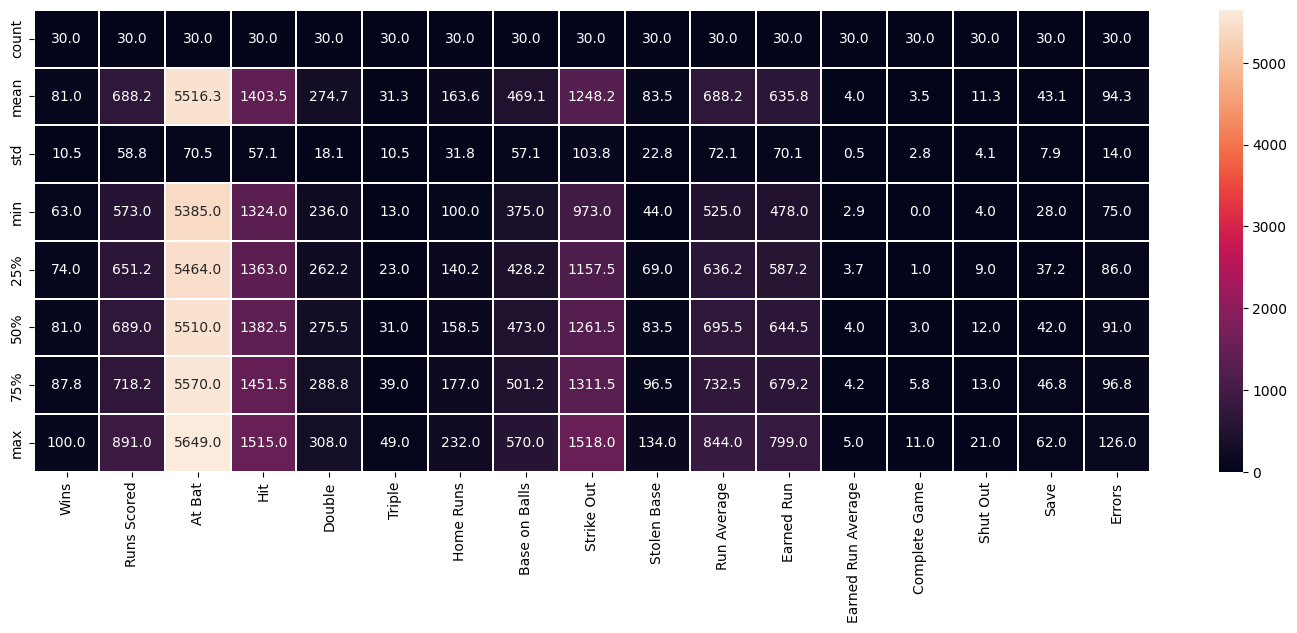

In [ ]:
# Visualizing the statistics of the columns using HeatMap.
plt.figure(figsize=(18,6))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

* **Take-Away:**
    
    * If we look at mean and 50% columns for different features we can see data is slightly skewed to the right for most of the features.
    * Count is same for each variable.
    * 75% and max values for 'Errors','Shutout','Run Scored' shows presence of possible outliers.
    * Overall all statstical parameters from mean to max, indicate features are seem to be progressing in a definite manner showing no visible abnormalities.
    * Heatmap clearly shows data need to scale while building ML Model.

### **Exploratory Data Analysis(EDA):**

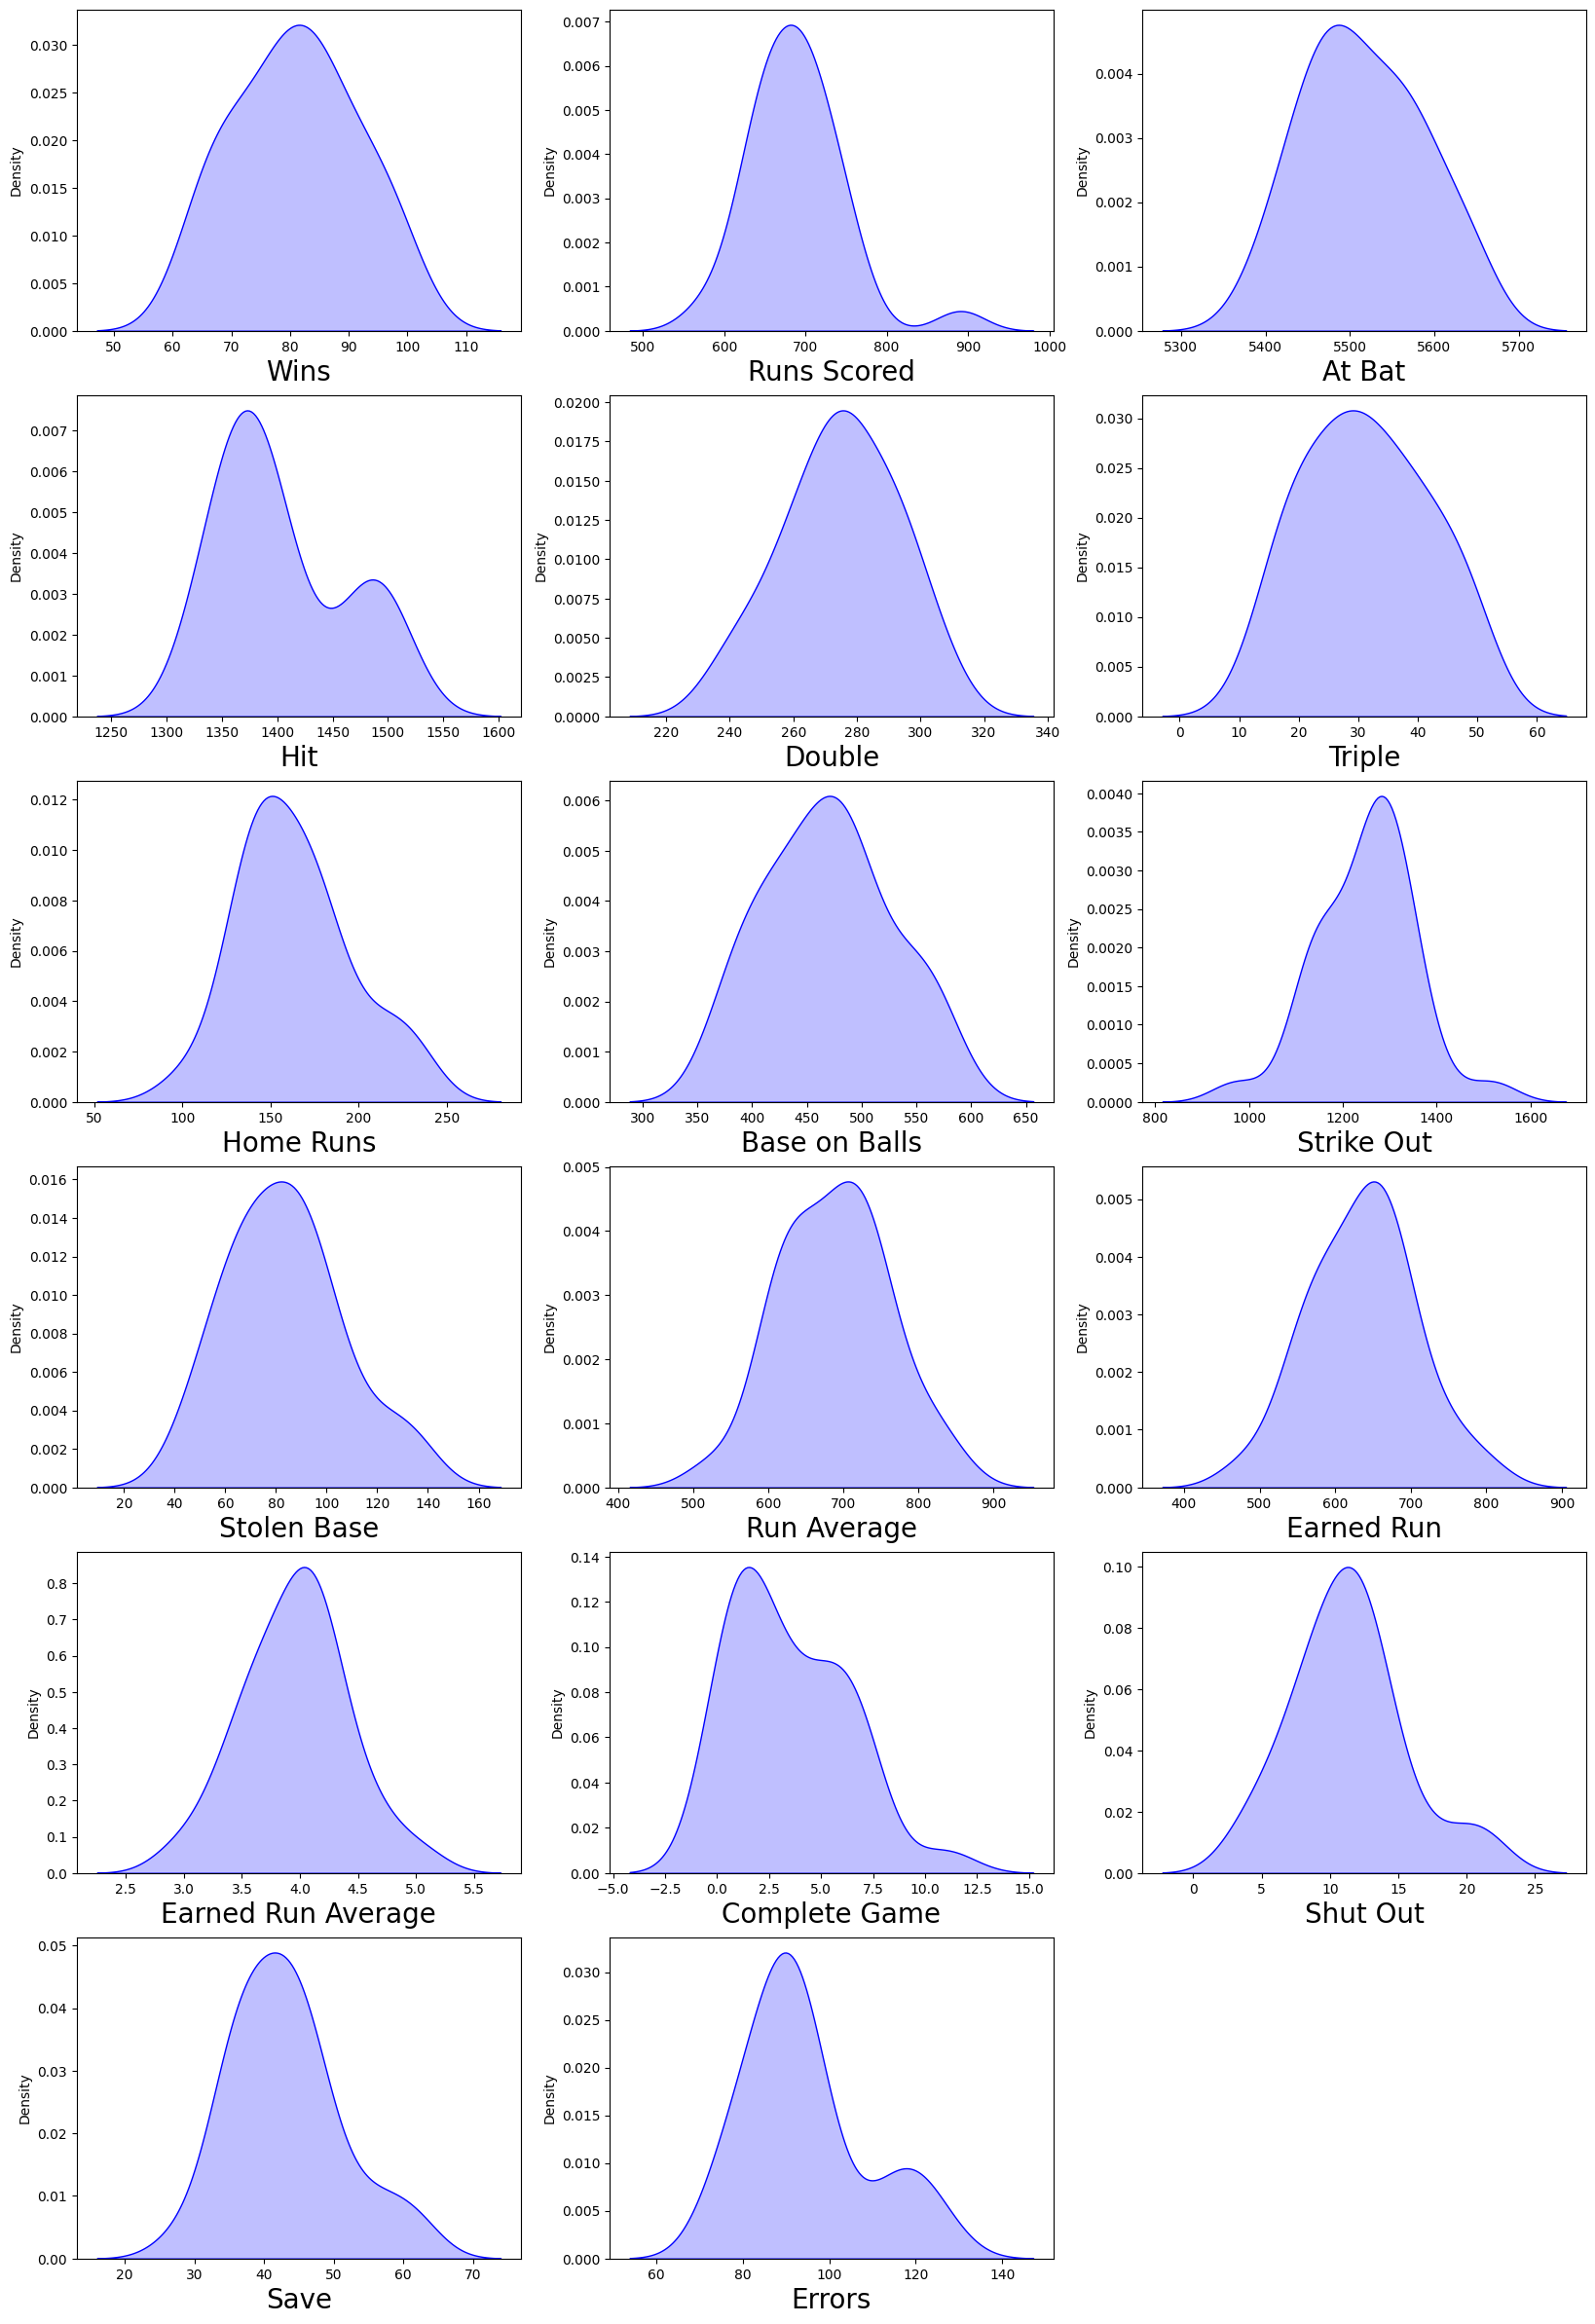

In [ ]:
#Distribution of features for Skewness detection
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='Blue',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hit                   0.670254
Double               -0.230650
Triple                0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Out           -0.156065
Stolen Base           0.479893
Run Average           0.045734
Earned Run            0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Out              0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

* ***Take-away:***
    
 * Some of features are skewed to either left or right

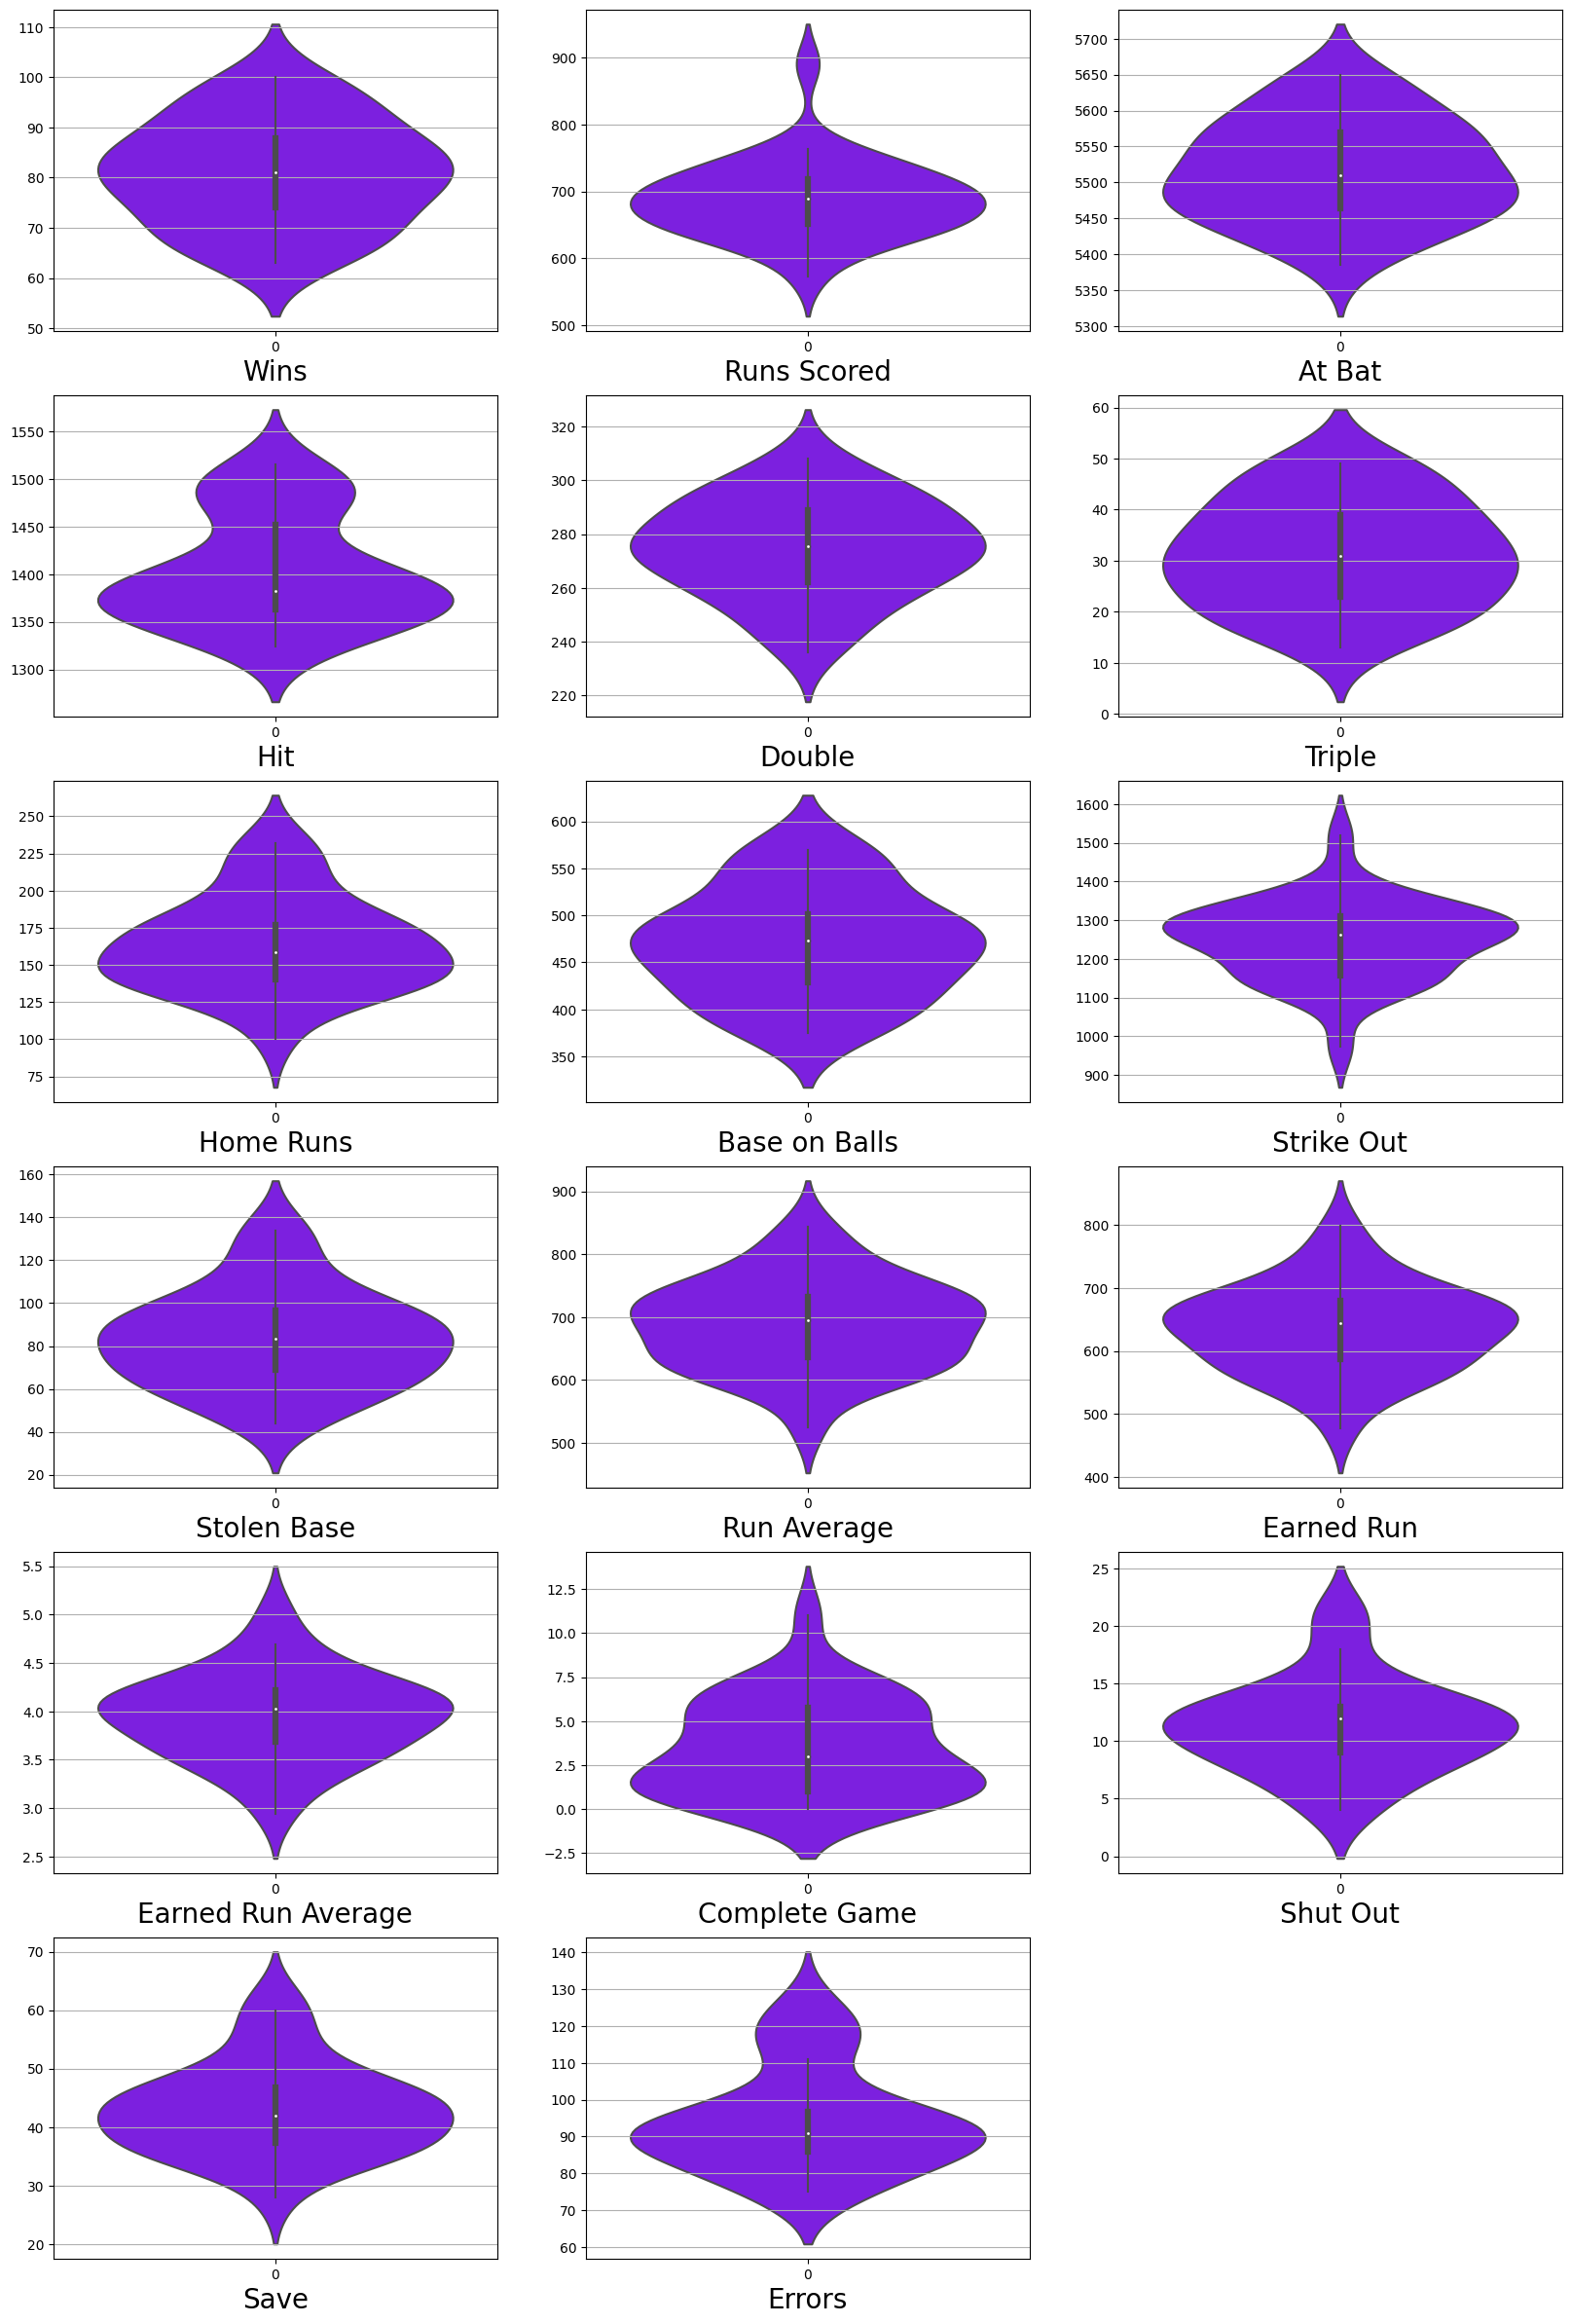

In [ ]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        ax.yaxis.grid(True)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* ***Take-away:***
    
    * Shut out and Complete Game occur very rarely nowadays which we can definitely see in violinplot of these variables.
    * Errors does not count as a Hit but still counts as an at bat for the batter, So need to dive into how much Errors are contributing at bat.
    * Most of saves are between 30 & 50. Save does not entitle pitcher as wining pitcher but still it bring wins for team.It will be interesting what relation Wins and Save hold or how much saves contribute in Win.
    * Run average, Earned run and Earned Run Average are important for pitcher statstics. We can see there is not much difference in plot of Earned run and Run Average, so from here we can conclude that Unearned Run is not making much difference in wins.
    * Home runs (125 to 175 peak) are more than Triple (20 to 40 majority) so most of good shot by battar directly convert into homeruns.
    * As we know pitcher try to keep Earned Run Average low which eventually lead to wins. Here for most of game ERA is around 3.5-4.5.
    * Let consider violinplot of Double and Base on Balls. We know that if pitcher pitched ball for consecutive 4 ball then Base is awarded to batter. Clearly More runs comes from Base of BallS than double.

**Now we will investigate Runs and Hit together but before that let we know how a team  win and some clearity over Run and Hit**

* **How does a team win baseball game ?**

    To win in baseball, a team must reach the end of the game with more runs than the opponent. If both teams have equal runs, they will go into another inning until one team has more runs at the end of the inning.

* **Defining Runs and Hits:-**

    * Runs (R) - The number of runs scored by that player, by reaching home base in any manner.
    * Hits (H) - The number of base hits made by that player, not including reaching base on an error or on a "fielder's choice".
    
Now we will put insight on how many hits convert into Runs and in return lead to win throgh various analysis

Text(0, 0.5, 'Hit')

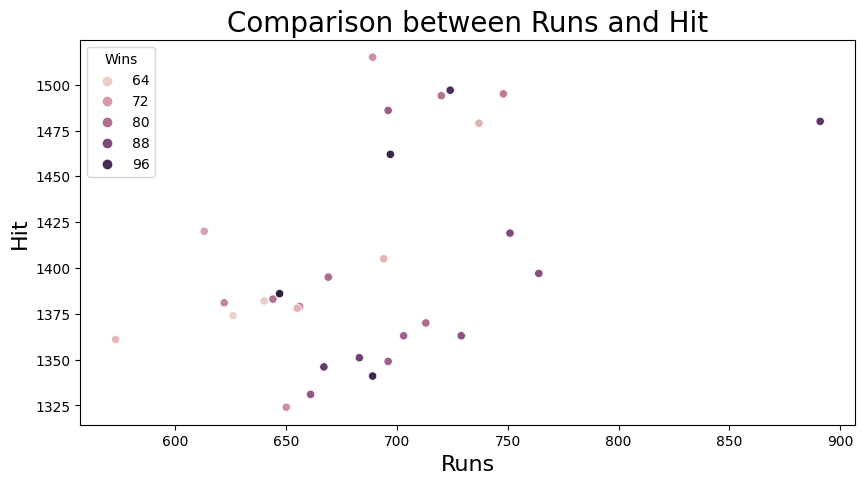

In [ ]:
# Checking the relation between two variables 'Runs Scored' & 'Hit'
sns.set_palette('dark')
plt.figure(figsize=[10,5])
plt.title('Comparison between Runs and Hit',fontsize =20)
sns.scatterplot(x='Runs Scored',y='Hit', data=df, hue=df['Wins'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hit",fontsize =16)

* ***Take-away:***
    
    * Even if number of times ball hit bat is less than 1375 still runs in range of 650 to 750 contribute to win.
    * Very less wining chance for runs less than 650 and no of hit less than 1325.
    * There is one outlier in runs. After checking sknewness we can decide whether to keep to while building ML model or remove it even if it is valid data point. Definitely it will affect performance of ML model if we consider outlier data points as most of data point will not fall in that side, leading to a biased model.

Text(0, 0.5, 'Home Runs')

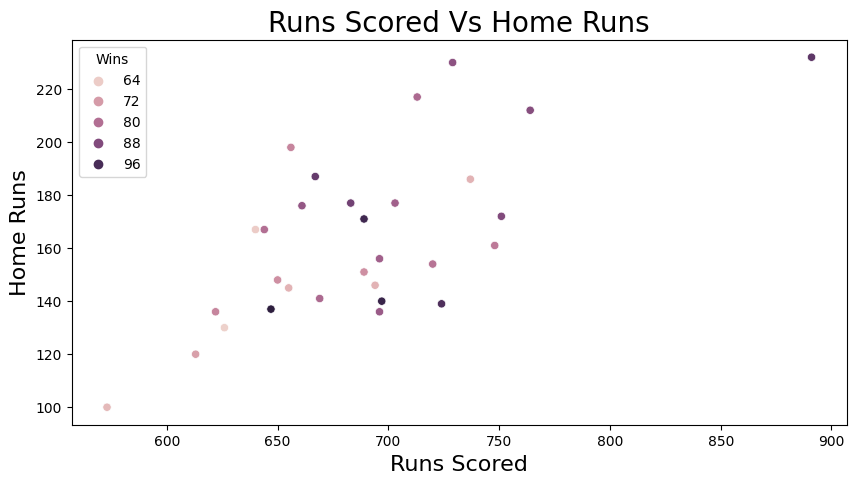

In [ ]:
# Checking the relation between two variables 'Runs Scored' Vs 'Home Runs'
sns.set_palette('Set1')
plt.figure(figsize=[10,5])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(x='Runs Scored',y='Home Runs',data=df,hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

* **Take_away:**
    
    * Home Runs in range of 140-180 with combination of Run Scored in between 650-750 lead to more than 90 Wins for          team. So keeping home runs in this range is cruical for more possibility of wins.
    * But still it is a game, anything is possible with good performance of single winning player. We can see from scatter      plot some of the datapoints have homeruns above 200, but still in wins are around 80.
    
* <b> In conclusion we can say that Home runs is definitely contributing factor for team to win but not sufficient to make sure win.

Text(0, 0.5, 'At Bat')

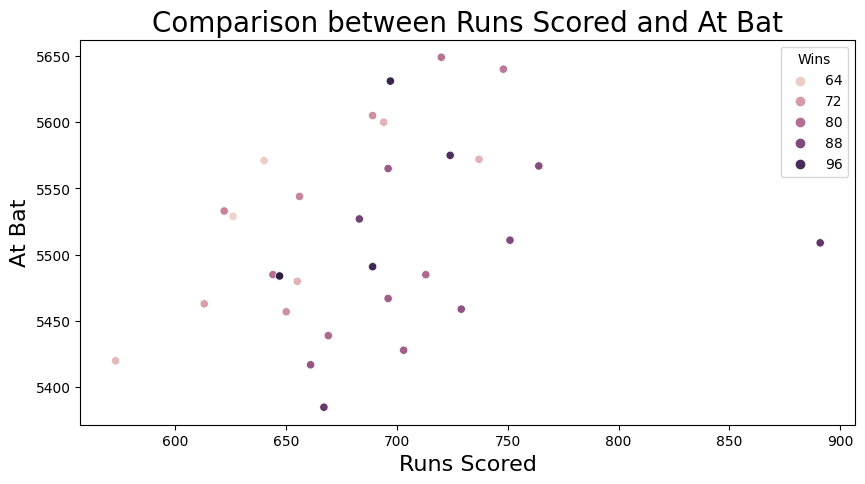

In [ ]:
# Checking the relation between two variables 'Runs Scored' and 'At Bat'
sns.set_palette('dark')
plt.figure(figsize=[10,5])
plt.title('Comparison between Runs Scored and At Bat', fontsize =20)
sns.scatterplot(data=df,x='Runs Scored',y='At Bat',hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

* **Take-away:**
    
    We do not get any benchmark range for at bats from here. So it is questionable things that how much At bats matter to winning statstics. Atleast we get here that At Bat and Run Scored has positive linear relationship, which means that more Run Scroed naturally lead to more at bats.

Text(0, 0.5, 'Strike Out')

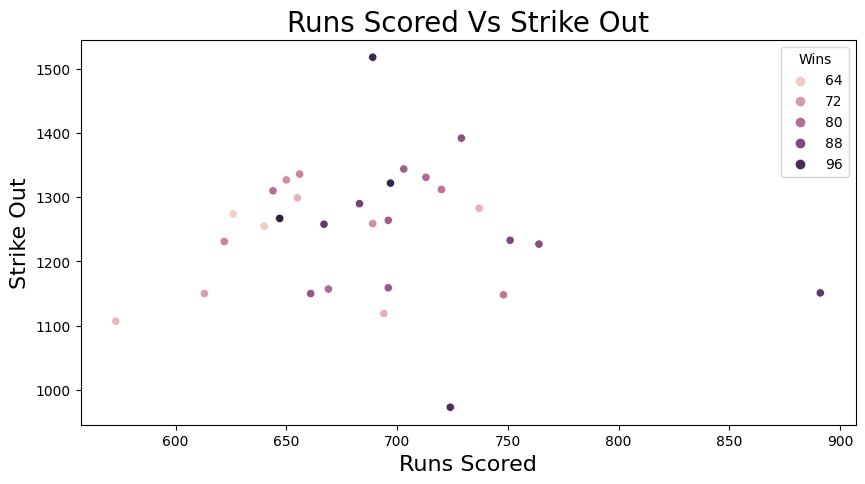

In [ ]:
# Checking the relation between two variables 'Runs Scored' & 'Strike Out'
sns.set_palette('dark')
plt.figure(figsize=[10,5])
plt.title('Runs Scored Vs Strike Out',fontsize =20)
sns.scatterplot(data=df,x='Runs Scored',y='Strike Out',hue=df['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Strike Out',fontsize =16)

* **Take-away:**

    * In simple word strike Outs means batter is out. We can see Strike out opponent team below 700 runs essential for           more win.
    * Clearly Strikeout below 1200 is like losing game. Strikeouts in regular interval not only lead to pressure on             opponent in game but also bring break on high run score.

Text(0, 0.5, 'Earned Run Average')

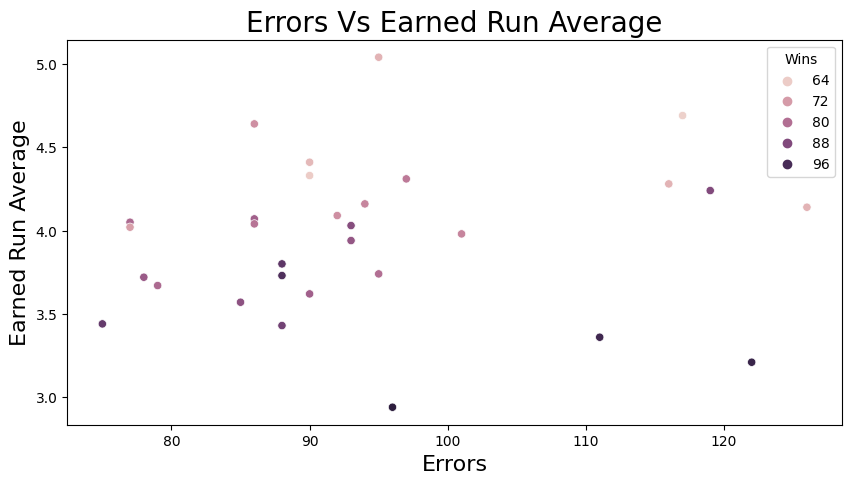

In [ ]:
# Checking the relation between two variables 'Errors' & 'Earned Run Average'
sns.set_palette('dark')
plt.figure(figsize=[10,5])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(data=df,x='Errors',y='Earned Run Average',hue=df['Wins'])
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

* ***Take-away:***

 * Same result about ERA we got here as we get in Violin Plot.
 * Keeping ERA below 3.5 or as much as low by Pitcher leads to sure win.Bykeeping low ERA pitcher saves run for his team.
 * Another thing we can see in above scatter plot is that Minimum error means maximum wins. Keeping Errors below 90 (<90) can be held as benchmark.

Text(0, 0.5, 'Earned Run Average')

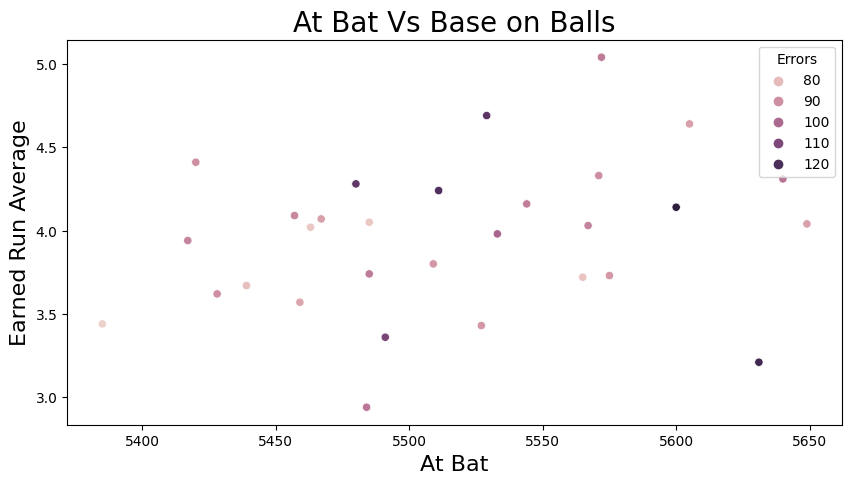

In [ ]:
# Checking the relation between two variables 'At Bat' & 'Base on Balls'
sns.set_palette('dark')
plt.figure(figsize=[10,5])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(data=df,x='At Bat',y='Earned Run Average',hue=df['Errors'])
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

* ***Take_away:***

    At Bat Vs Base on Balls doesnot give any significant imformation.High ERA means High Errors

***Boxplot of Features:***

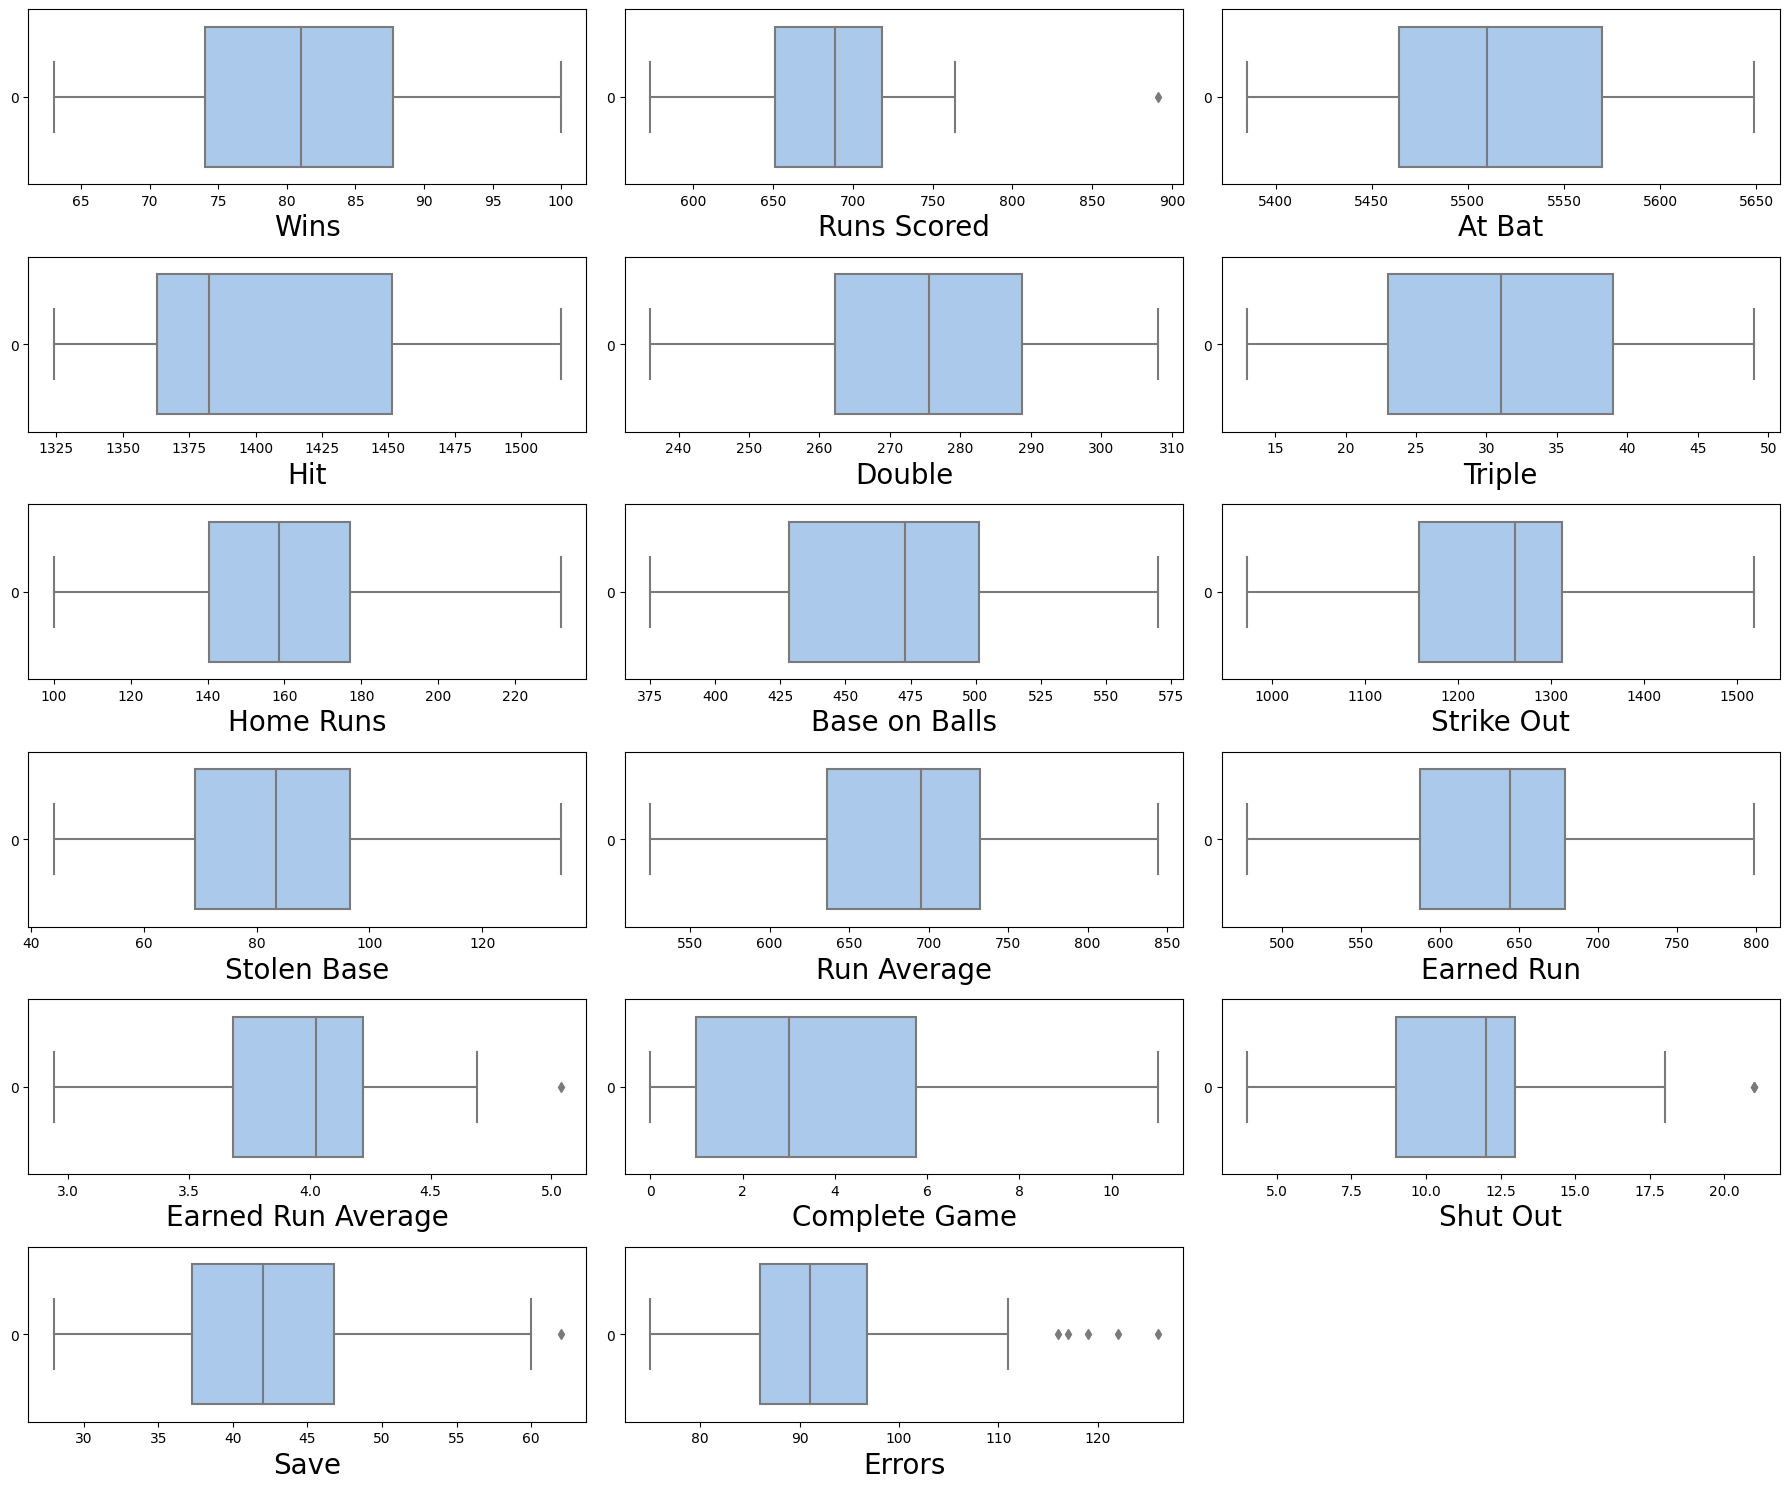

In [ ]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='pastel',orient='h')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

* **Take-away:**
    
    * There are some outliers present in data. But as data is of Real world MLB 2014, these outliers are valid datapoints.
    * Shutouts are rare but completely possible with exceptional performance.
    * Run scored has one outliers but as Run is one of the most important parameter, it will be wise to remove                   corresponding datpoint.
    * Outliers in Errors are totally possible so now need to worry about it.

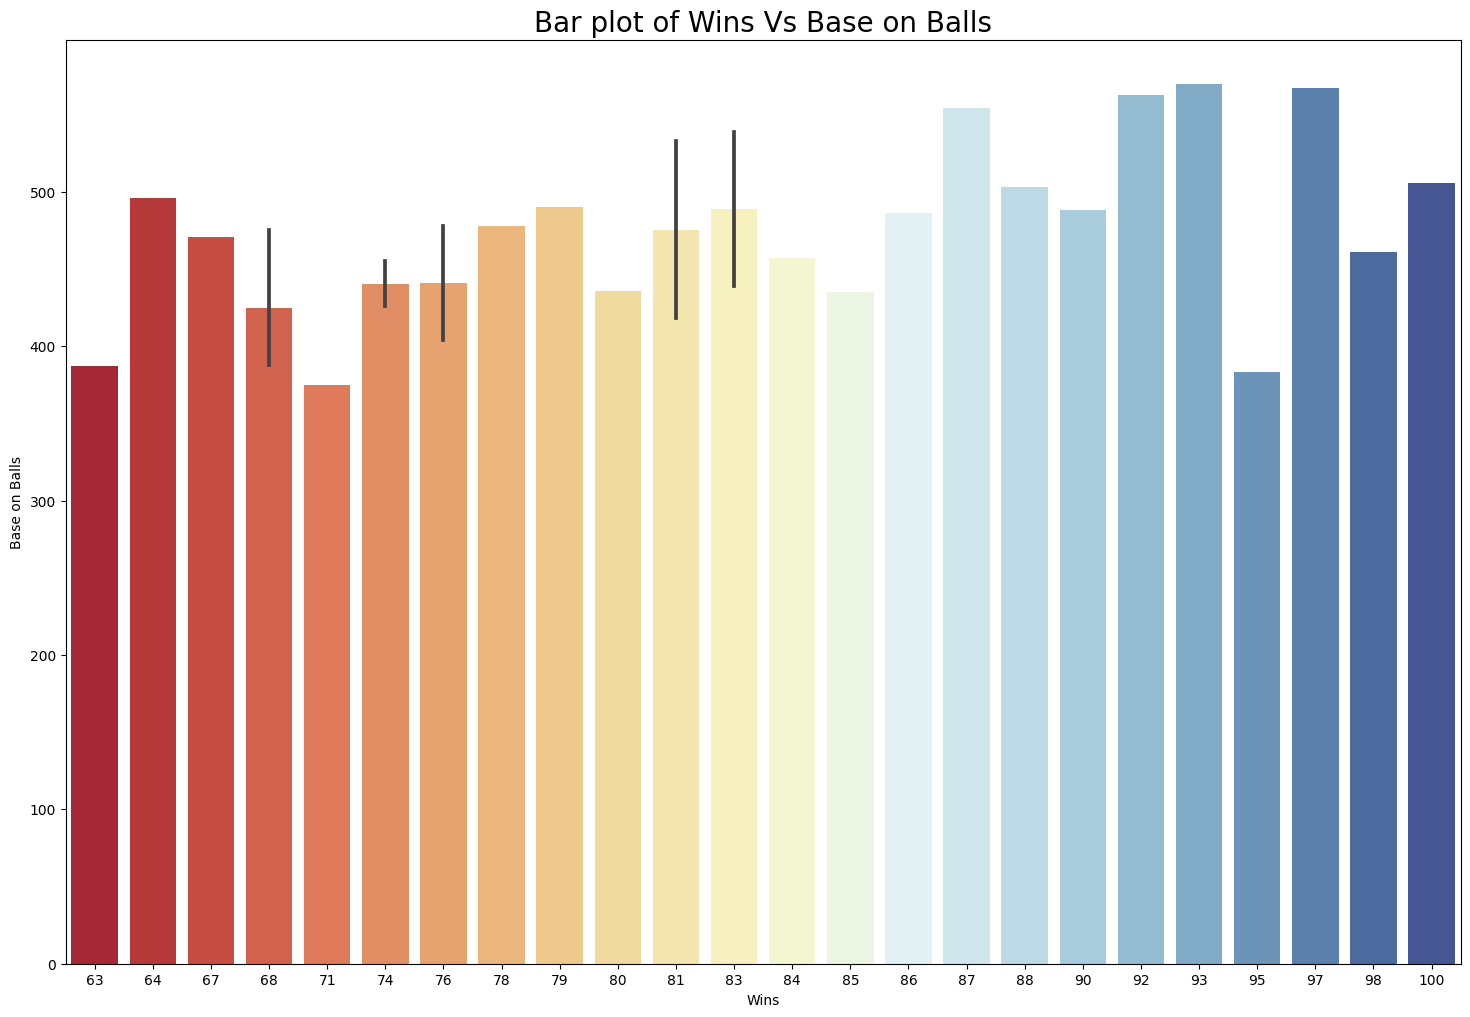

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df,palette='RdYlBu')
plt.title('Bar plot of Wins Vs Base on Balls', fontsize =20)
plt.show()

* ***Take-away:***
    
    * Base on balls is contribution from pitcher to batter for winning. In simple it is like Wide or No Ball in Cricket.
    * We can see that Base on Balls above 400 really contribute in Wins of the team.

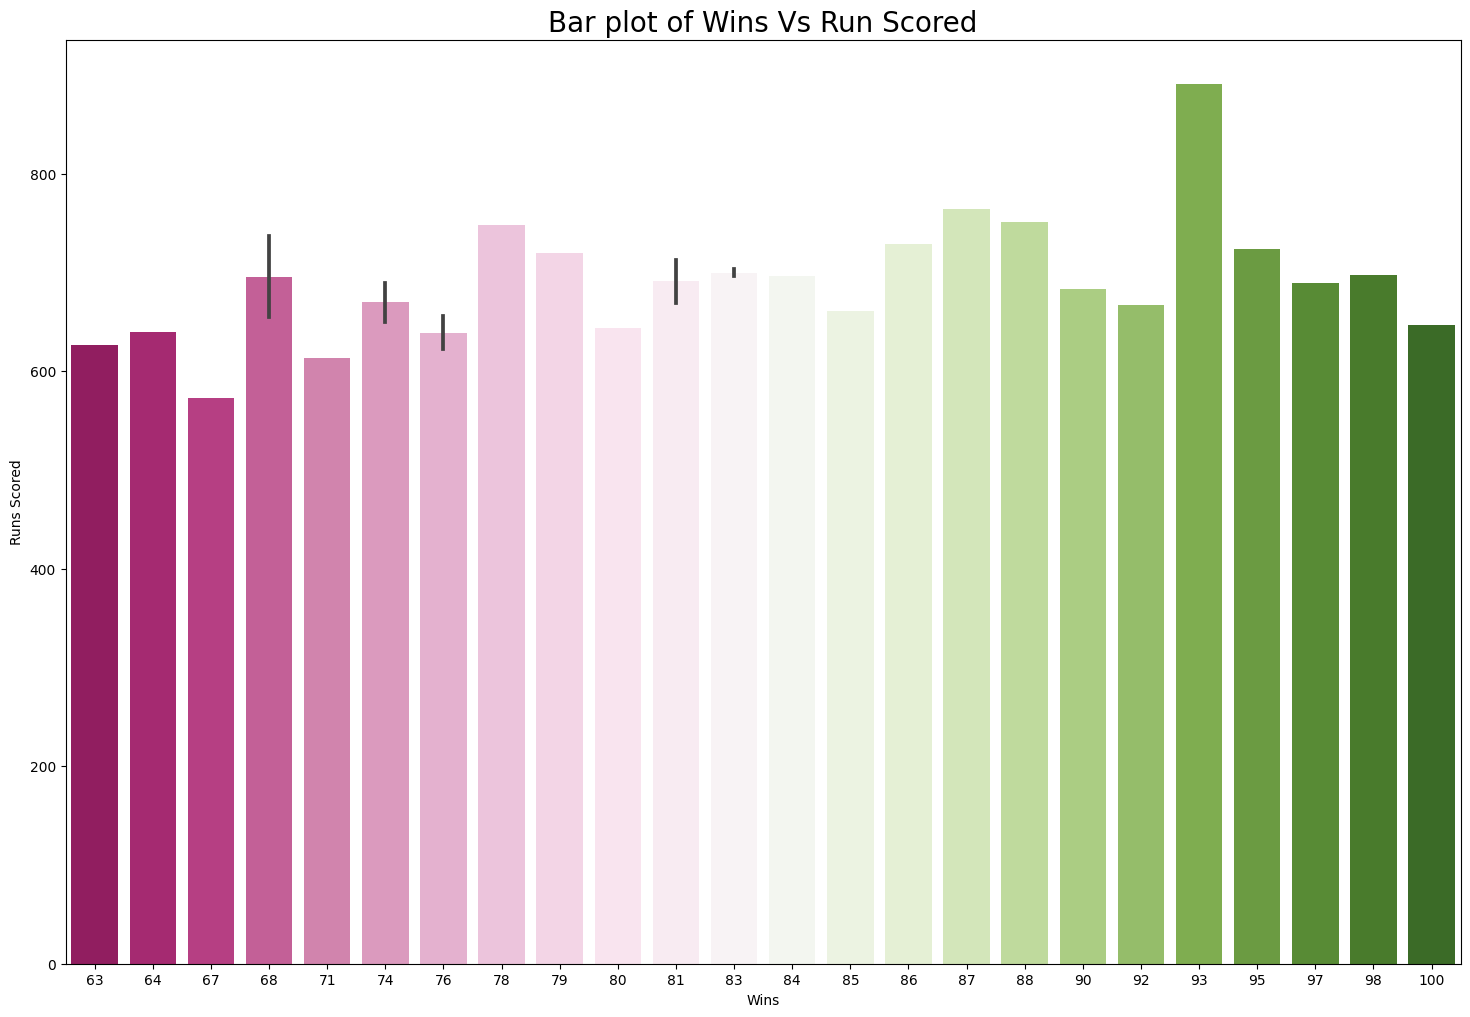

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.title('Bar plot of Wins Vs Run Scored', fontsize =20)
plt.show()

* ***Take-away:***
   
    Run Scored above 600 is benchmark for winning in any scenerio

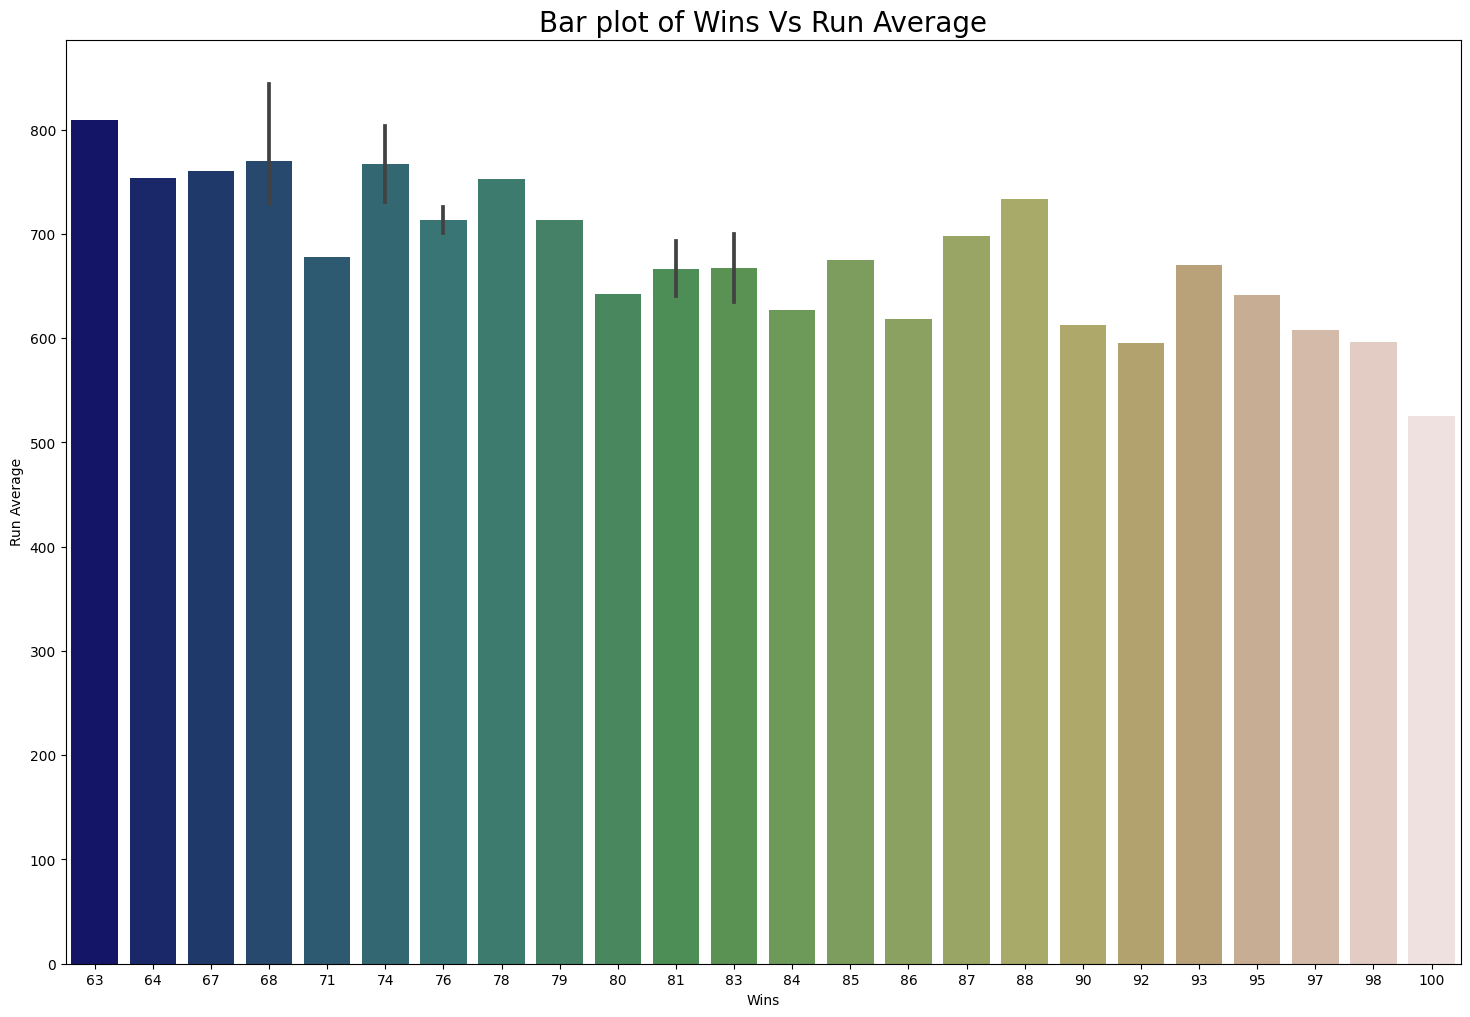

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Run Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

* ***Take-away:***
    
    * Here comes interesting plot, we can see Run Average decrease with increase in number of wins. But why this trend if  more runs means directly increase in chance of winning.
    * More Run Average gives advantage to hitter and here as wins are high even at low run this clearly means that  perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score. This must be  reflected in any pitcher side stastical parameter like Strike outs, Earned Run or Earned Run Average.

<b> Lets try find answer of this million dollor puzzle by diving more into relation of Wins with parameters like ERA, Strike out.

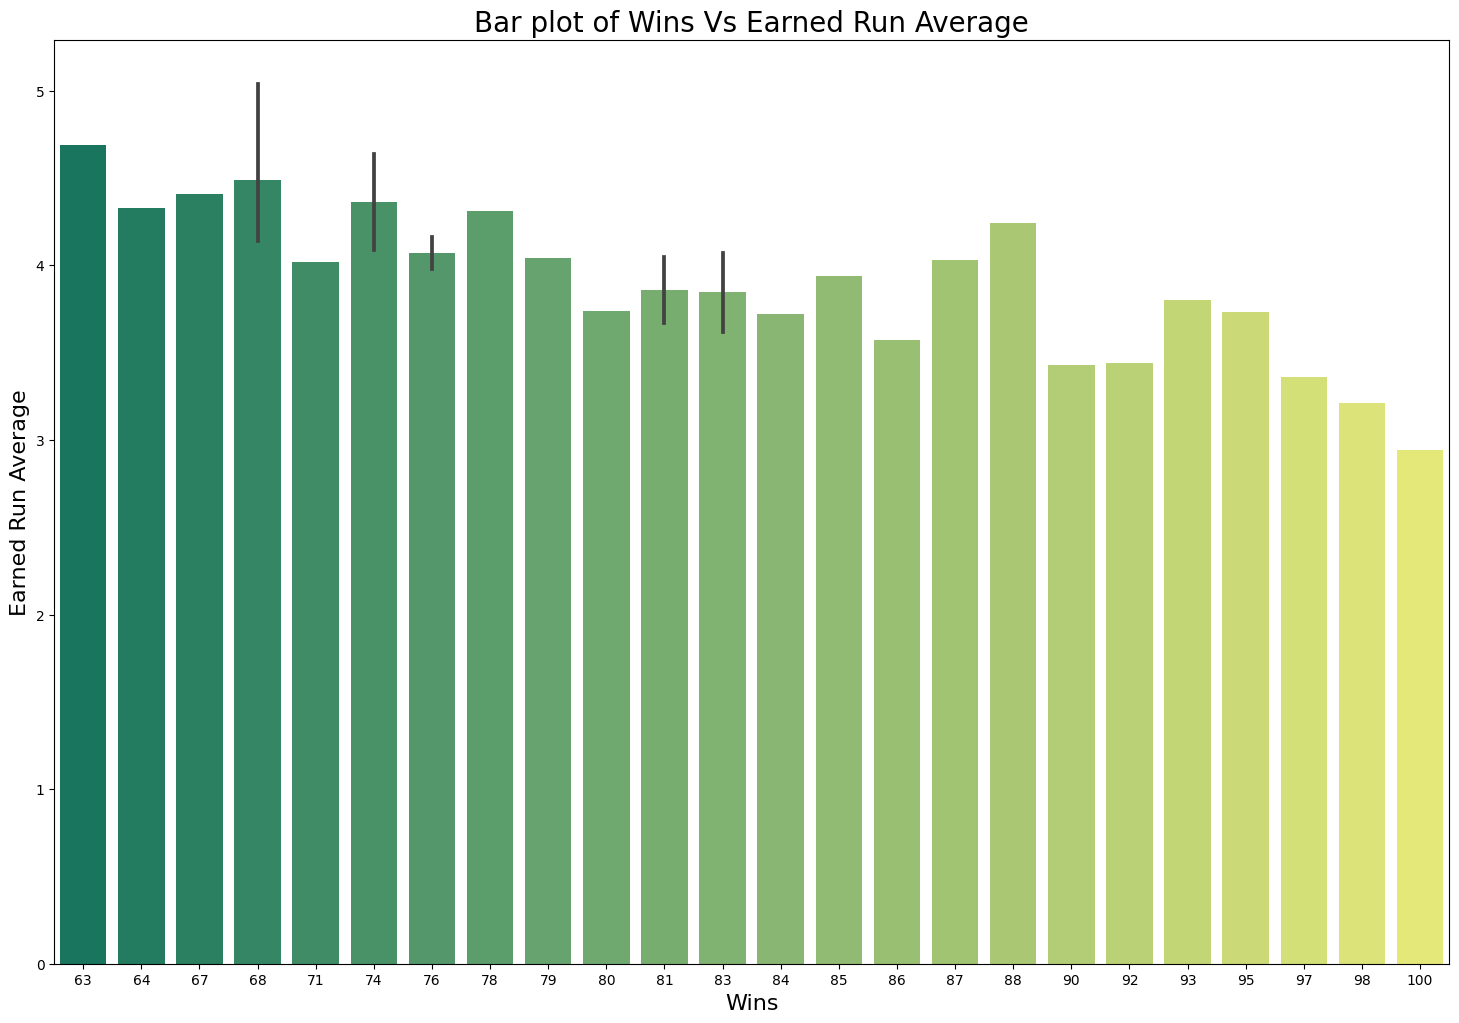

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df,palette='summer')
plt.title('Bar plot of Wins Vs Earned Run Average', fontsize =20)
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()

* ***Take-away:***
    
    * Here we got what we looking for.As we thought there must be atleast one pitcher parameter where this decreasing   trend must be reflected.
    * ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to  score run.
    * We already come to conclusion of keeping ERA less than 3.5 in previous result. This plot also support that story.
    * But this also indicate that ERA and Runs Average score are bound to related with each other in linear relationship  (may be positive or negtive).
    * Another things here is that Earned Run and Wins must have negative relationship. we will check it in further  investigation.

<b> Let check it through strip plot between Run Average and Earned Run Average

Text(0, 0.5, 'Earned Run Average')

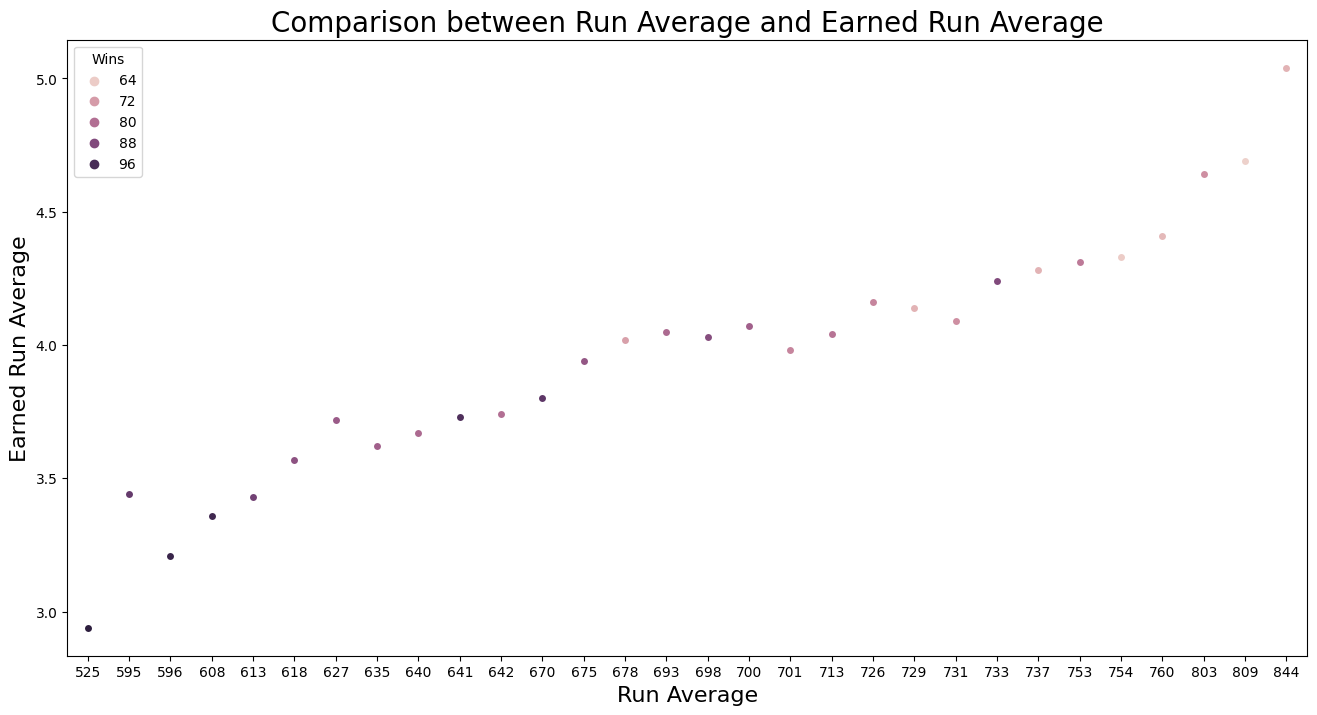

In [ ]:
# Checking the relation between two variables 'Run Average & 'Earned Run Average',
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(x= 'Run Average', y='Earned Run Average',data=df,hue=df['Wins'])
plt.xlabel('Run Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

* **Take-away:**

     Here we got what we conceived in previous plot. Earned Run Average(ERA) and Run Average(RA) hold Linear relationship

<b> Let check if Strike Out shows same behavior as ERA with respect to Run Average

Text(0, 0.5, 'Strike Out')

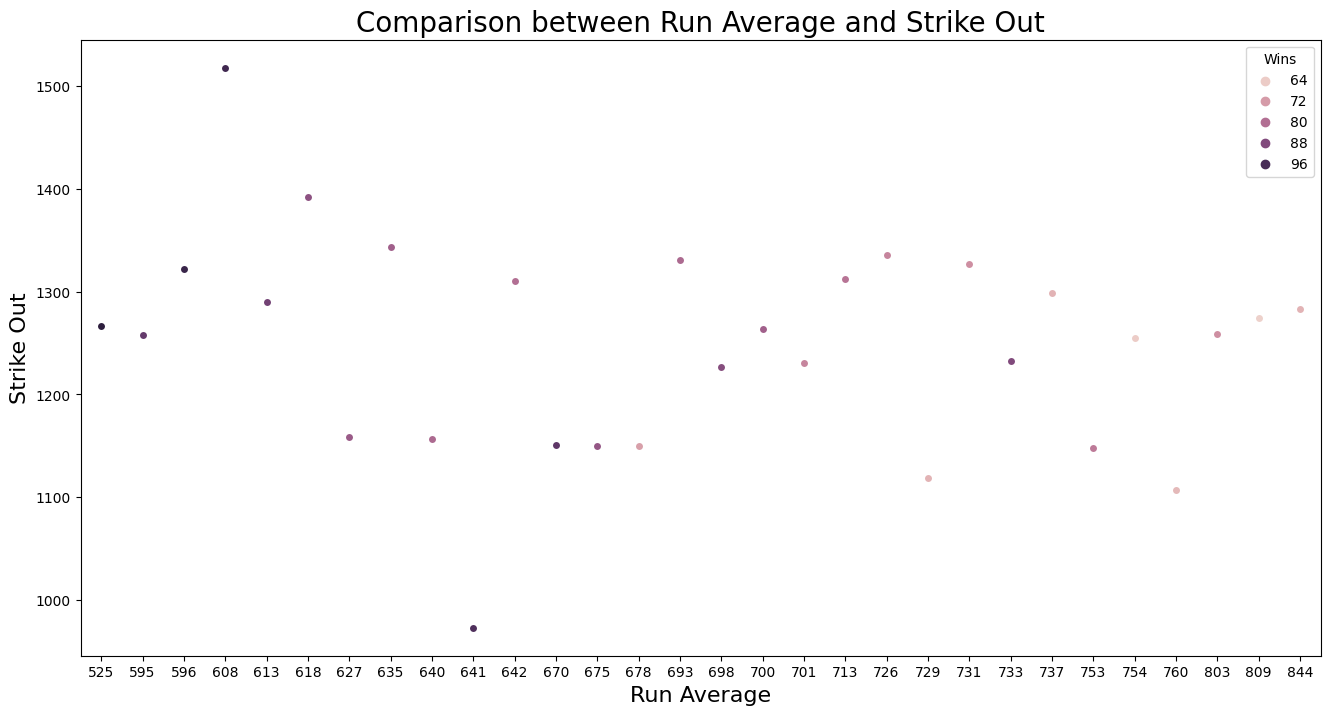

In [ ]:
# Checking the relation between two variables 'Strike Out' & 'Run Average'
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Strike Out', fontsize =20)
sns.stripplot(x='Run Average',y='Strike Out',data=df,hue=df['Wins'])
plt.xlabel('Run Average',fontsize =16)
plt.ylabel("Strike Out",fontsize =16)

* **Take-away:**
        
    Strike Out are randomly placed giving not much any significant insights. We might consider Strike Out does not matter.
    
<b> There is one outlier in Runs score, lets check that entry

In [ ]:
df['Runs Scored'].max()

891

In [ ]:
df.loc[df['Runs Scored']==891]

Wins  Runs Scored  At Bat   Hit  Double  Triple  Home Runs  Base on Balls  \
5    93          891    5509  1480     308      17        232            570   

   Strike Out  Stolen Base  Run Average  Earned Run  Earned Run Average  \
5        1151           88          670         609                 3.8   

   Complete Game  Shut Out  Save  Errors  
5              7        10    34      88

* It seems like highest Double, Home Runs and Base on Balls also belong to this entry. We will cross check for validation-

In [ ]:
df['Home Runs'].max(),df['Base on Balls'].max(),df['Double'].max()

(232, 570, 308)

* Here we found what we doubted

<b> In one of the previous result we conceived that Earned Run/Earned Run Average and Wins must have negative relationship, we will check by looking at jointplot-

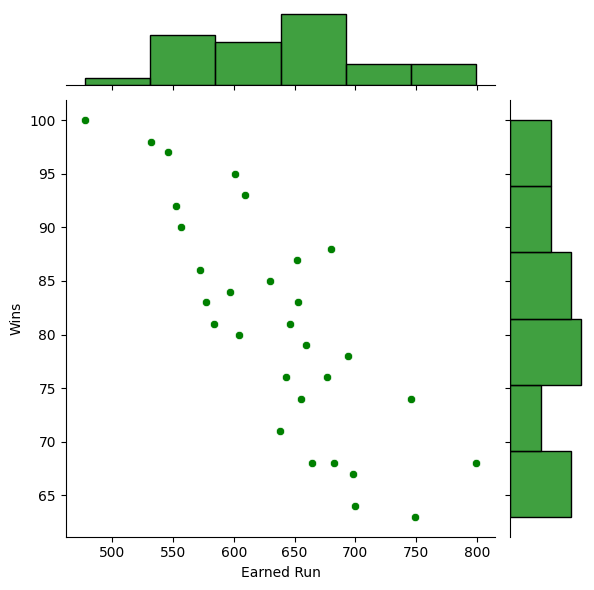

In [ ]:
sns.jointplot(x="Earned Run", y="Wins", data=df, color="green",palette="Set1")

<b> In one of the previous result we suspect that Earned Run/Earned Run Average and Wins must have negative relationship, let check by looking at jointplot-

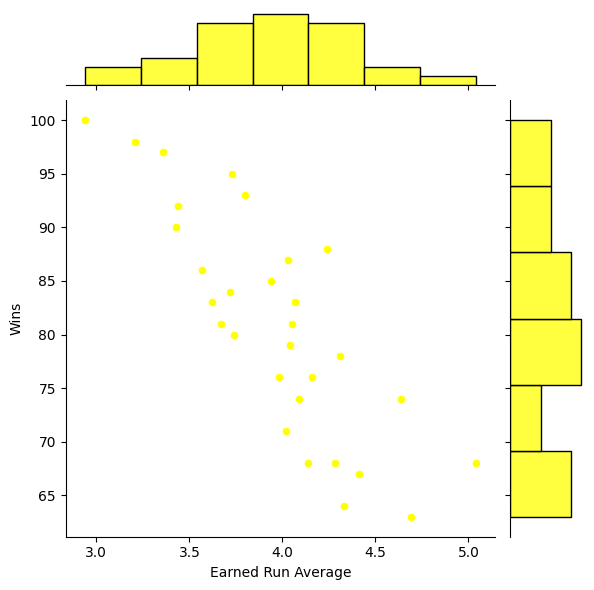

In [ ]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="yellow",palette="Set1")

<b> __Jointplot shows same story about Earned Run/Earned Run Average and Wins having linear negative relationship__

<b> Let check relationship between saves and wins-

<Figure size 1000x1000 with 0 Axes>

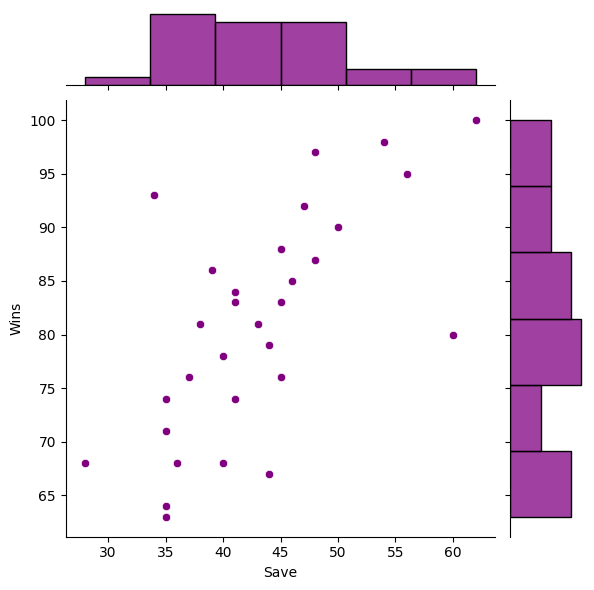

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Save", y="Wins", data=df, color="purple")

* **Take-away:**
    
    * A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances
    * Here with increase in the number of save increases the nu

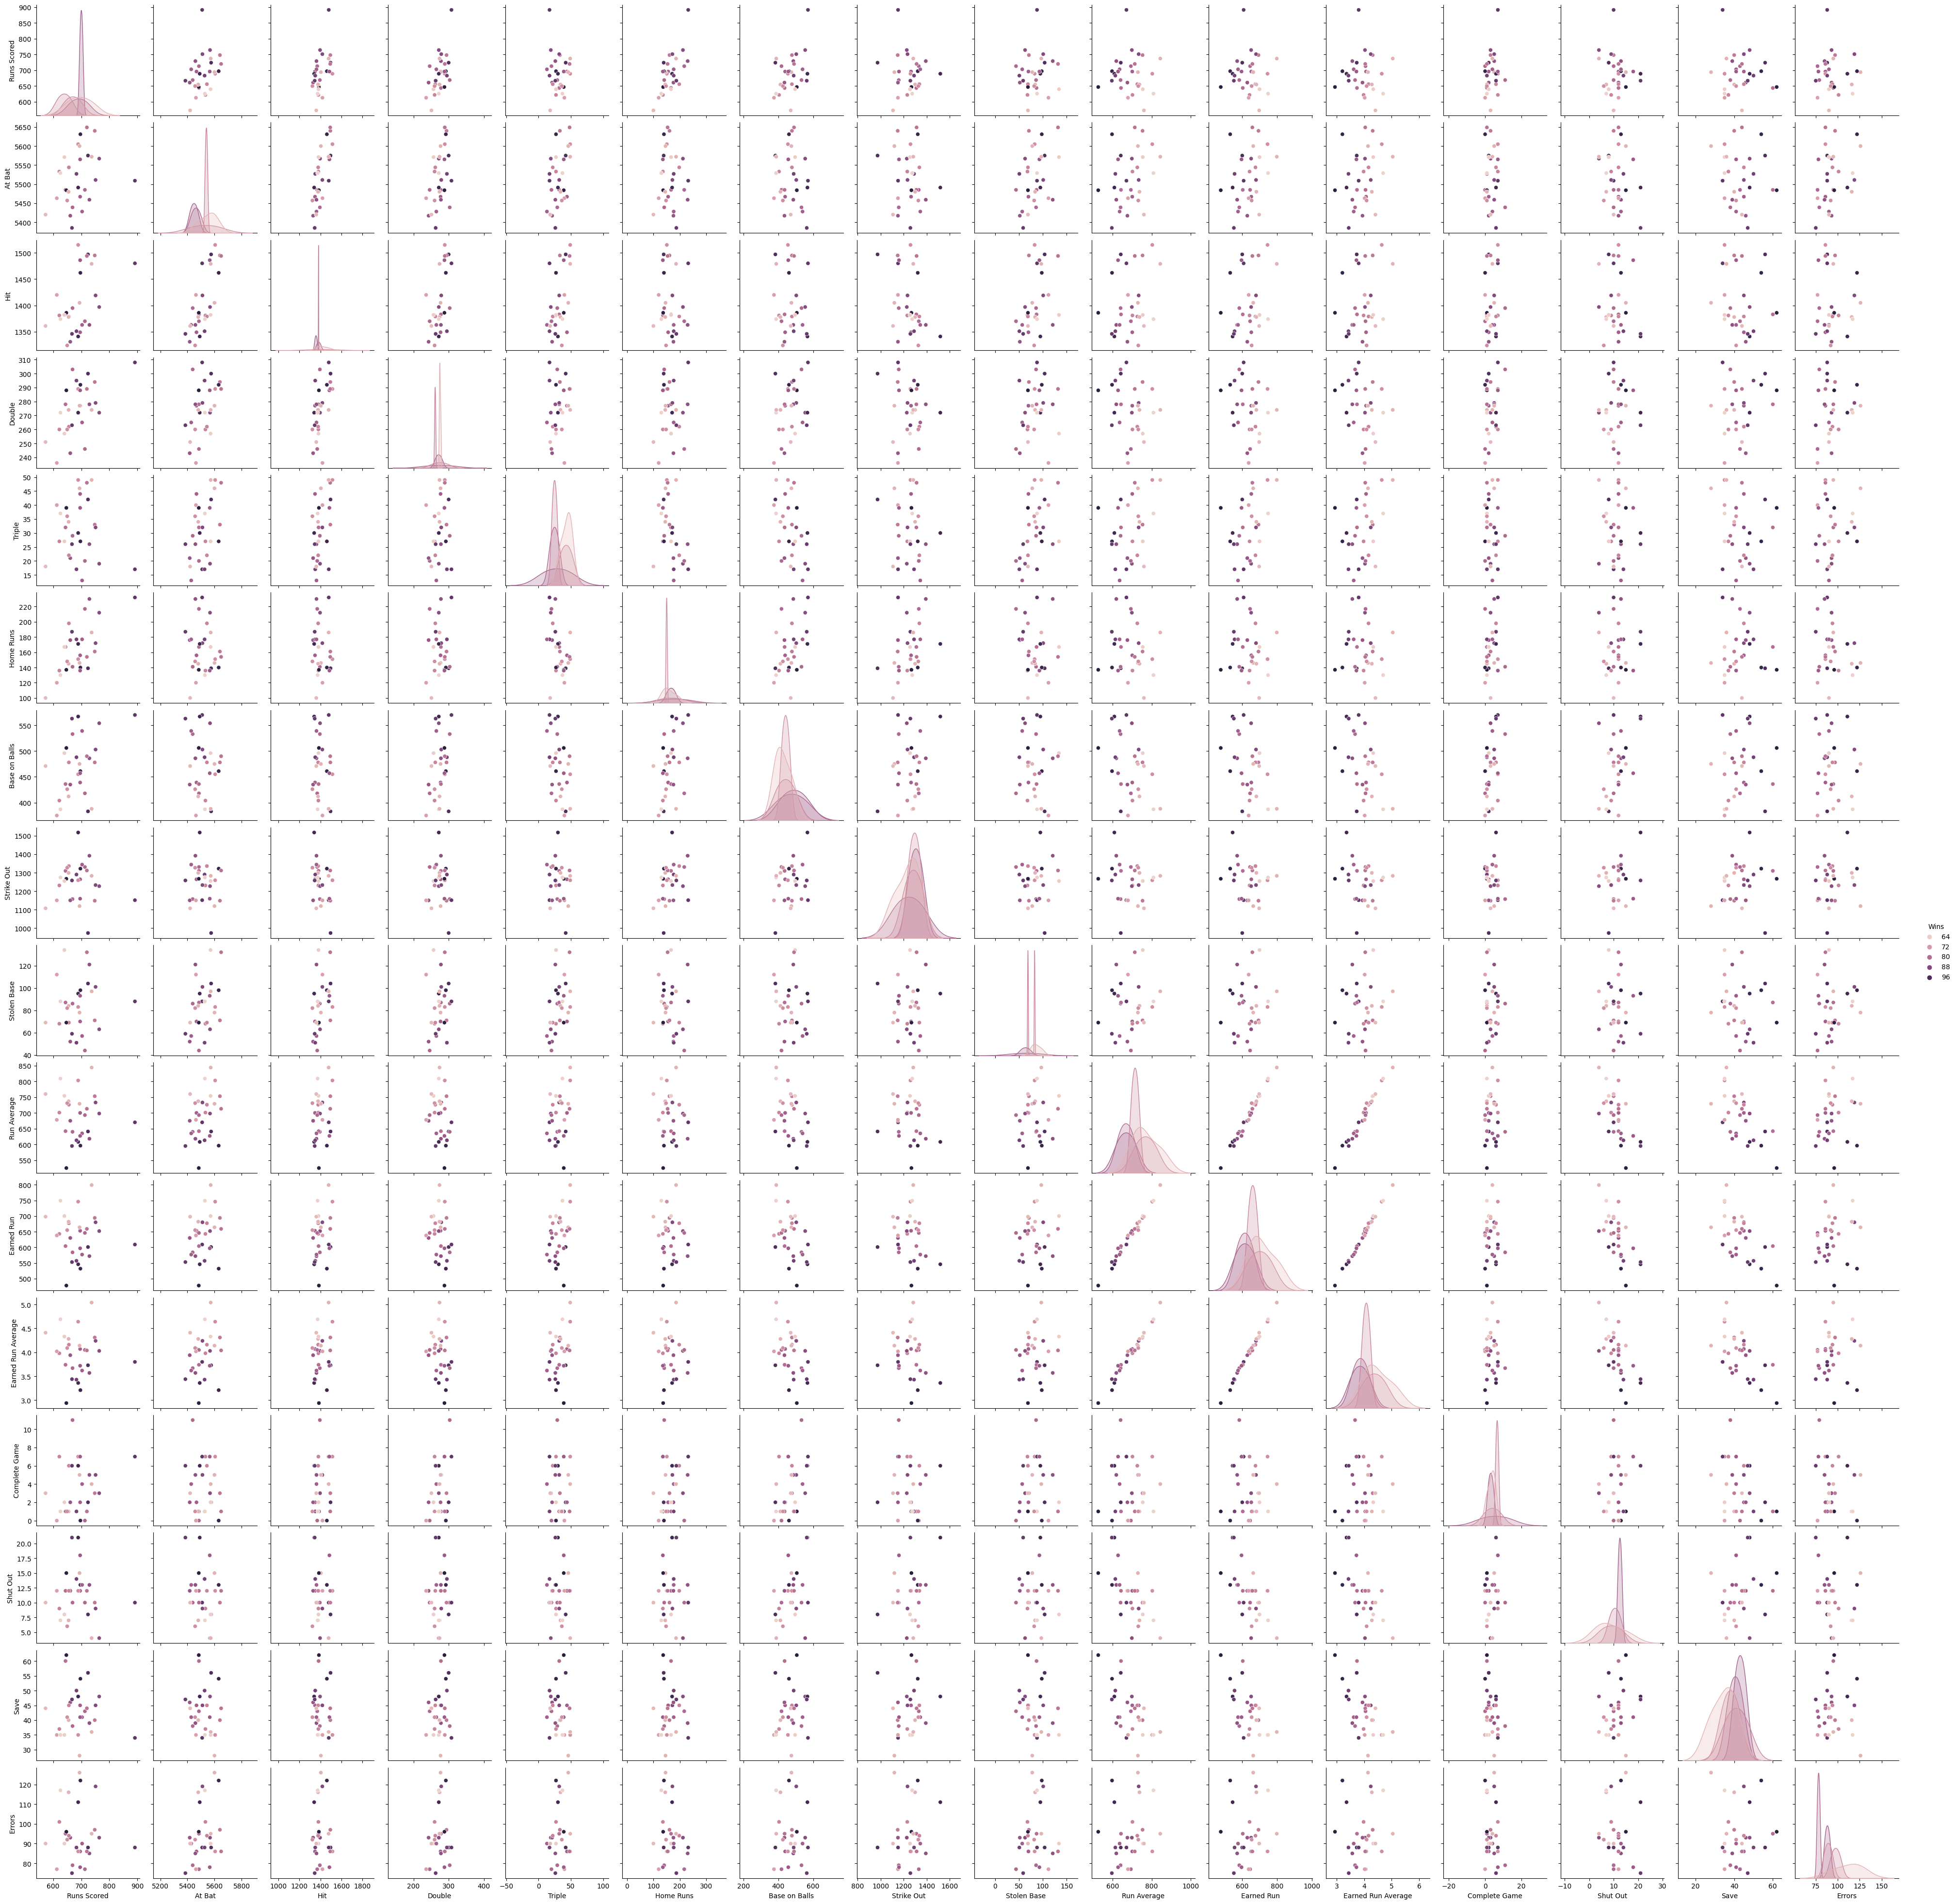

In [ ]:
sns.pairplot(df, hue="Wins")

### **Outliers Detection and Removal:**

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [ ]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [ ]:
#Data Loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


### **Feature selection and Engineering:**

### 1. Skewness of features

In [ ]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hit                   0.783772
Double               -0.335304
Triple                0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Out           -0.233815
Stolen Base           0.494966
Run Average           0.018155
Earned Run            0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Out              0.526943
Save                  0.627480
Errors                0.840271
dtype: float64

* <b> 1. Optimal range for skewness is -0.5 to 0.5.
* <b> 2. Hit, Complete Game, Shut Out, Save, Errors are positively Skewed in nature.Hence,transformation needed.

**Transforming positive or right skew data using boxcox transformation-**

In [ ]:
from scipy.stats import boxcox

In [ ]:
df1['Hit']=boxcox(df1['Hit'],-2)

In [ ]:
df1['Shut Out']=boxcox(df1['Shut Out'],0.5)

In [ ]:
df1['Save']=boxcox(df1['Save'],0.5)

In [ ]:
df1['Complete Game']=boxcox(df1['Complete Game'],0.5)

* <b> We will use yeo-johnson method to transform feature 'Errors'-

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
EC=['Errors']

In [ ]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors'])])
transformed_yeojohnson =column_trans.fit_transform(df1)
new_col=['Errors']
df2=pd.DataFrame(transformed_yeojohnson,columns=new_col) #to convert numpy array back into dataframe
pd.concat([df2],axis=1)
df2.head()

Errors
0 -0.348265
1 -0.540820
2 -1.326125
3  0.650818
4 -0.540820

In [ ]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
df2.index=df1.index
df1[EC]=df2[EC]

**Skewness after transforming features-**

In [ ]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hit                   0.000000
Double               -0.335304
Triple                0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Out           -0.233815
Stolen Base           0.494966
Run Average           0.018155
Earned Run            0.018461
Earned Run Average    0.016693
Complete Game        -0.260678
Shut Out             -0.085802
Save                  0.370280
Errors                0.065585
dtype: float64

* <b> Skewness of all the features are now transform within permissible optimal range of skewness i,e;  -0.5 to 0.5

**2. Corrleation**

In [ ]:
df1.corr()

Wins  Runs Scored    At Bat       Hit    Double  \
Wins                1.000000     0.390451 -0.085780 -0.025885  0.384886   
Runs Scored         0.390451     1.000000  0.438022  0.429083  0.469293   
At Bat             -0.085780     0.438022  1.000000  0.771485  0.490752   
Hit                -0.025885     0.429083  0.771485  1.000000  0.525668   
Double              0.384886     0.469293  0.490752  0.525668  1.000000   
Triple             -0.206737     0.134204  0.445604  0.574467  0.342419   
Home Runs           0.245697     0.586894 -0.064653 -0.219890 -0.098695   
Base on Balls       0.447513     0.258450 -0.137850 -0.220426  0.211243   
Strike Out          0.156469     0.081158 -0.111243 -0.375825 -0.096772   
Stolen Base        -0.169503     0.075323  0.373674  0.424369  0.194308   
Run Average        -0.823176    -0.013858  0.315499  0.241583 -0.215196   
Earned Run         -0.815308     0.007727  0.309146  0.278600 -0.224993   
Earned Run Average -0.826952    -0.009122  0.254872  0.254635 -0.248212   
Complete Game      -0.003340     0.141559 -0.064516  0.050816  0.256132   
Shut Out            0.477949    -0.119300 -0.193987 -0.134500  0.088345   
Save                0.754886     0.071589 -0.127766 -0.093443  0.258675   
Errors             -0.079633     0.039865  0.332002 -0.012712  0.152541   

                      Triple  Home Runs  Base on Balls  Strike Out  \
Wins               -0.206737   0.245697       0.447513    0.156469   
Runs Scored         0.134204   0.586894       0.258450    0.081158   
At Bat              0.445604  -0.064653      -0.137850   -0.111243   
Hit                 0.574467  -0.219890      -0.220426   -0.375825   
Double              0.342419  -0.098695       0.211243   -0.096772   
Triple              1.000000  -0.369299      -0.404852   -0.196586   
Home Runs          -0.369299   1.000000       0.336814    0.479914   
Base on Balls      -0.404852   0.336814       1.000000    0.315566   
Strike Out         -0.196586   0.479914       0.315566    1.000000   
Stolen Base         0.483818  -0.166072      -0.117622    0.038188   
Run Average         0.312750  -0.092586      -0.425381   -0.140570   
Earned Run          0.333731  -0.062094      -0.455832   -0.177655   
Earned Run Average  0.325883  -0.070756      -0.465794   -0.195362   
Complete Game       0.009499   0.103823       0.446861   -0.065802   
Shut Out           -0.067667  -0.030256       0.434799    0.200067   
Save               -0.236230   0.084263       0.197177    0.105667   
Errors              0.080498  -0.165883      -0.056106    0.164817   

                    Stolen Base  Run Average  Earned Run  Earned Run Average  \
Wins                  -0.169503    -0.823176   -0.815308           -0.826952   
Runs Scored            0.075323    -0.013858    0.007727           -0.009122   
At Bat                 0.373674     0.315499    0.309146            0.254872   
Hit                    0.424369     0.241583    0.278600            0.254635   
Double                 0.194308    -0.215196   -0.224993           -0.248212   
Triple                 0.483818     0.312750    0.333731            0.325883   
Home Runs             -0.166072    -0.092586   -0.062094           -0.070756   
Base on Balls         -0.117622    -0.425381   -0.455832           -0.465794   
Strike Out             0.038188    -0.140570   -0.177655           -0.195362   
Stolen Base            1.000000     0.134315    0.146243            0.128848   
Run Average            0.134315     1.000000    0.991286            0.986781   
Earned Run             0.146243     0.991286    1.000000            0.997261   
Earned Run Average     0.128848     0.986781    0.997261            1.000000   
Complete Game         -0.038446     0.070145    0.073536            0.079962   
Shut Out              -0.098740    -0.641778   -0.639589           -0.639984   
Save                  -0.187605    -0.637543   -0.616471           -0.632172   
Errors                 0.070527     0.231036    0.16

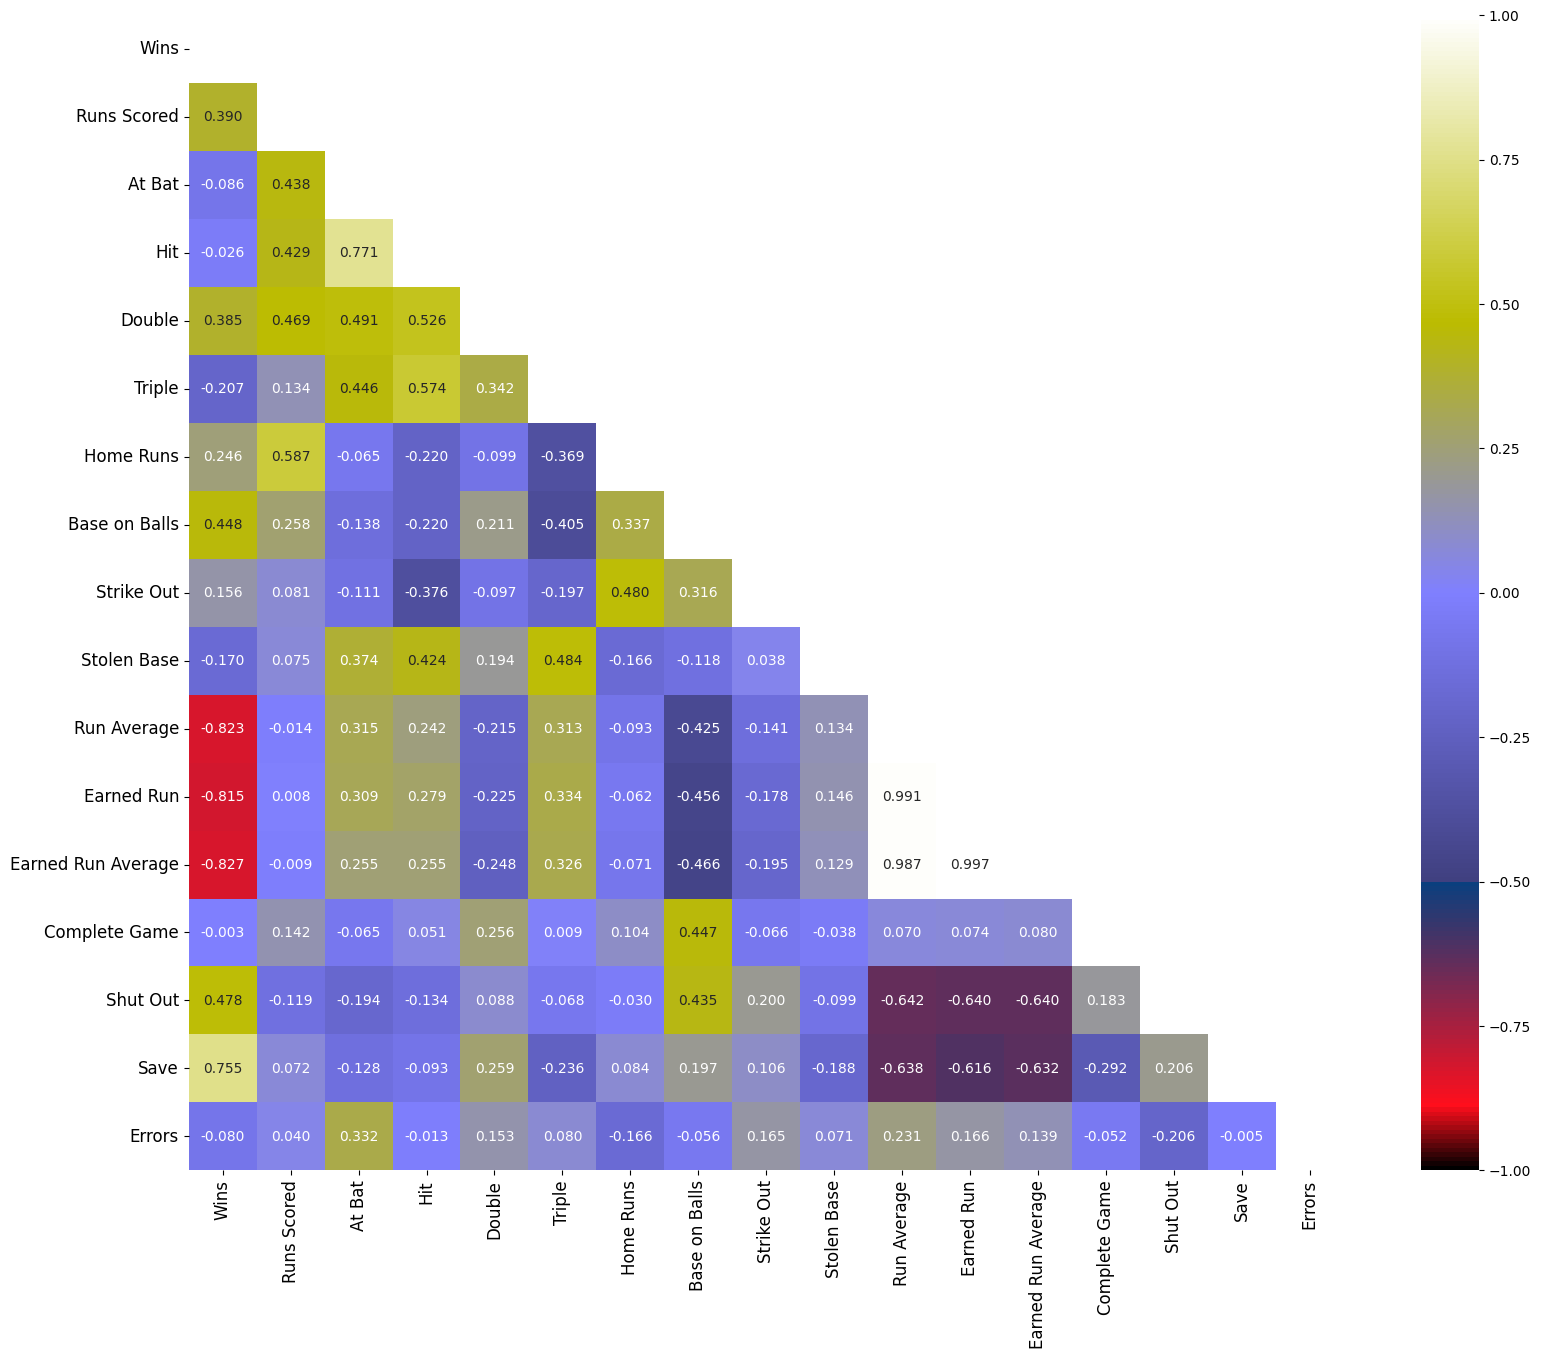

In [ ]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

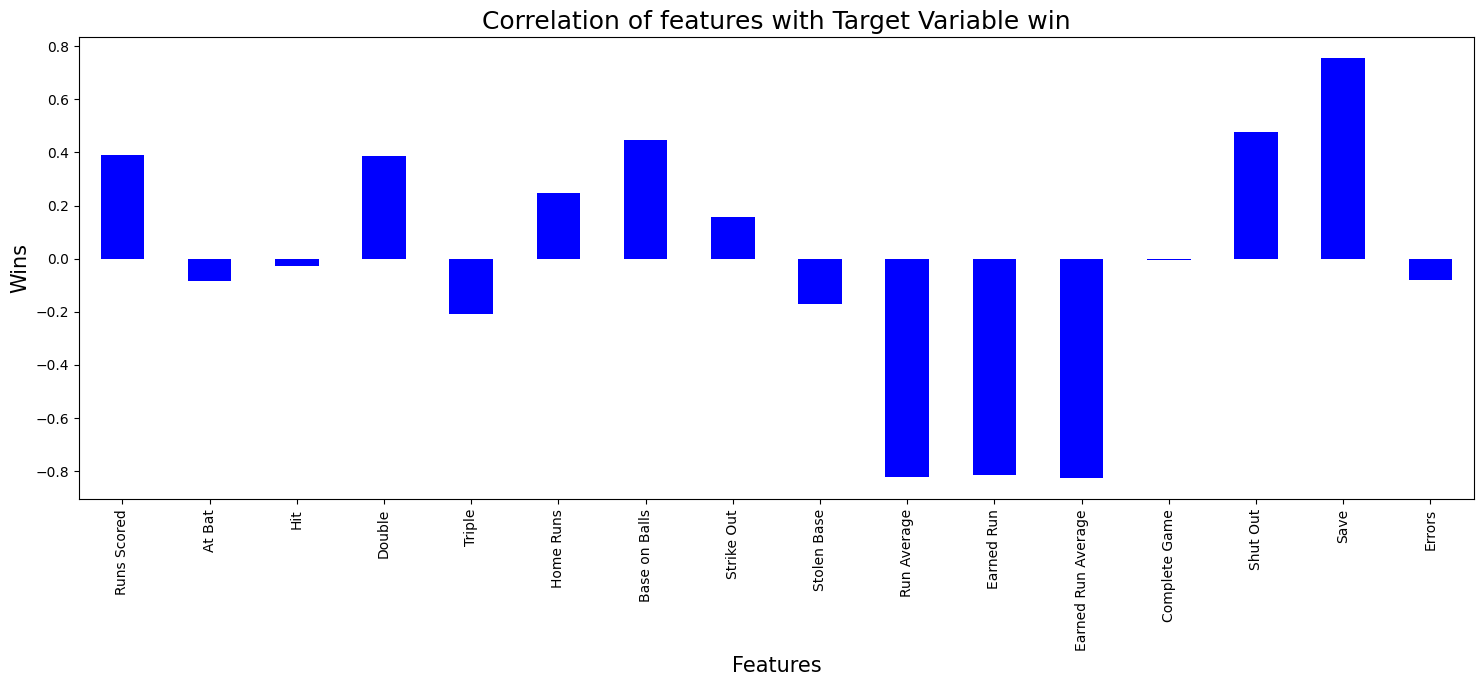

In [ ]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'Blue')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

* **Try-new:**
    
    * Hits, At bats, Complete game and errors are very poorly correlated with target variable.
    * Saves, ERA,RA,EA are highly correleated with target variable.
    * Here It is visible multi colinearity between the feature columns "Earned Run", "Earned Run Average" and "Run               Average". This need to check.

<b> This multicollinearity need to check it with varaiance inflation factor or need to address by use of PCA.

**3. Checking Multicollinearity between features using VIF(variance_inflation_factor)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF            Features
0     1183.683087                Wins
1     3237.926553         Runs Scored
2    69135.796892              At Bat
3    62531.438607                 Hit
4     1124.995048              Double
5       33.839157              Triple
6      250.000383           Home Runs
7      288.202372       Base on Balls
8      417.265979          Strike Out
9       26.024247         Stolen Base
10   18548.765697         Run Average
11  155284.653762          Earned Run
12  111161.243581  Earned Run Average
13       5.439007       Complete Game
14      48.490871            Shut Out
15     799.559176                Save
16       1.904127              Errors

* ***Take-away:***

**It is natural to have such high multicollinearity due to following reason :-**
1. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other.
2. At Bat and Hits are 0.771 correlated with each other. But at same time very poor correlated with target variable.
3. Another most important reason is data need to scale which we did not scale until now.

***Strategy to Address Multicollinearity :***
Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.
We will go by Second way for further investigation.

**Standard Scaling:**

In [ ]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

**Principal Component Analysis(PCA):**

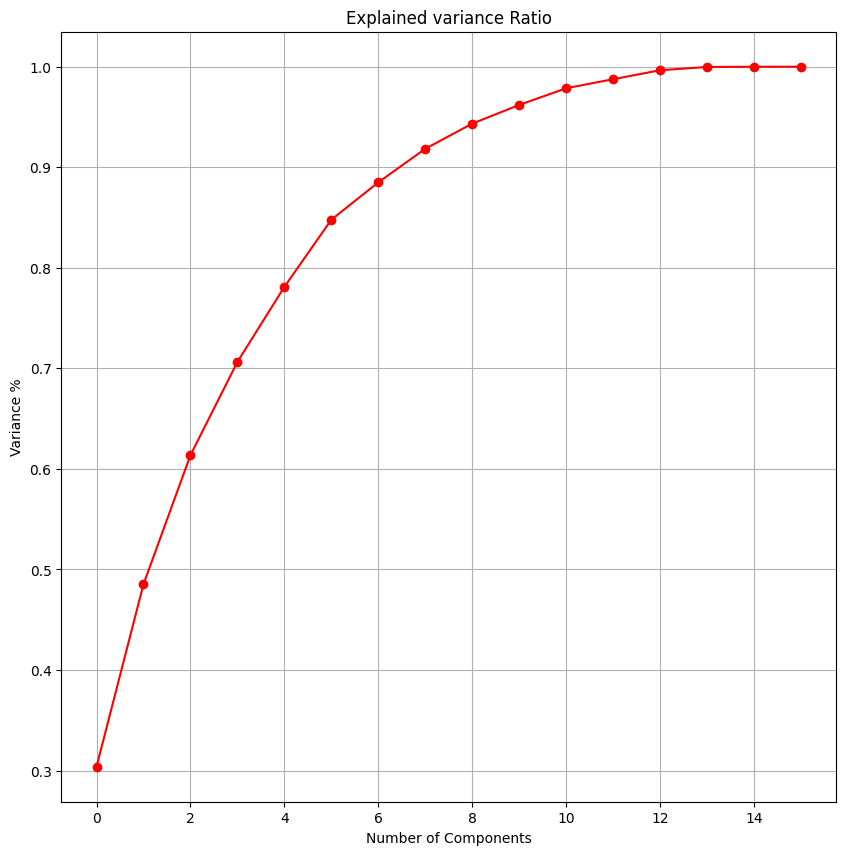

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

* ***Take-away:***

AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data. We shall pick the first 7 components for our prediction

In [ ]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [ ]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

**Checking Multicollinearity after applying PCA:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

<b> We solved the Multicollinearity issue.

### **Machine Learning Model:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


### **Finding Best Random state:-**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9176846849202432 on Random_state 219


##  **Linear Regression :**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=219, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [88.10109886 98.53801193 73.3496203  70.91344751 89.78267199 68.45212382
 69.14263982 64.00653022]


Actual Wins:
 20     83
14    100
27     74
18     64
5      87
21     71
22     67
23     63
Name: Wins, dtype: int64


**Linear Regression Evaluation Matrix:**

In [ ]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.825829045112833
Mean squared error : 12.027039239231328
Root Mean Squared Error: 3.4680021971203145


 R2 Score :
0.9176846849202432


**Cross Validation:**

In [ ]:
# Cross Validation
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.35034049715001175


### **Finding best n_neighbors for KNN Regressor:**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.516648189186454
RMSE value for k=  2 is: 9.908960591303208
RMSE value for k=  3 is: 7.993052538854533
RMSE value for k=  4 is: 8.590510753150827
RMSE value for k=  5 is: 8.453401682163221
RMSE value for k=  6 is: 9.203335747917105
RMSE value for k=  7 is: 9.253515603294145
RMSE value for k=  8 is: 9.297807201163078
RMSE value for k=  9 is: 9.28151953821526
RMSE value for k=  10 is: 9.654208926680635


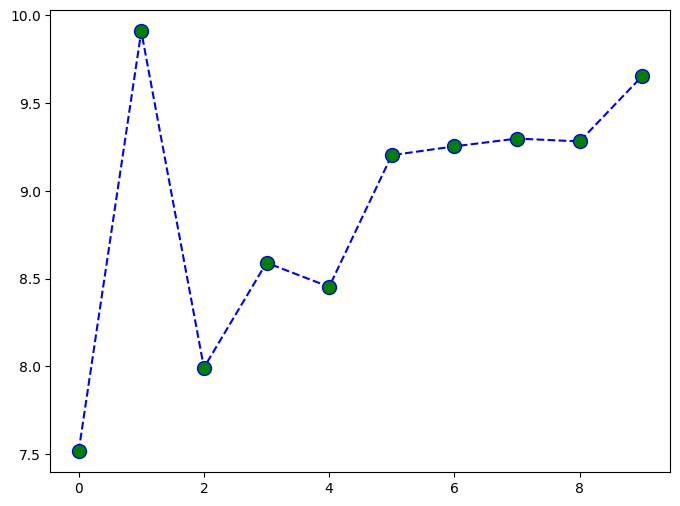

In [ ]:
#plotting the RMSE values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

* **Take-away:**
    
    At k= 1, we get the minimum RMSE value which approximately 7.516648189186454, and shoots up on further increasing the k value. We can safely say that k=1 will give us the best result in this case

### **Applying other Regression Models, Evaluation & Crossvalidation:**

In [ ]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='squared_error')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, max_iter=10)
rd=Ridge(alpha=1e-2)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))

    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 8.175778571428573
Mean squared error : 80.98315217871318
Root Mean Squared Error: 8.99906396125248


 R2 Score :
0.44573609887309984


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.25503836068212654


 Error of  Lasso(alpha=0.01, max_iter=10) :
Mean absolute error : 2.7938057577485402
Mean squared error : 11.879440751687925
Root Mean Squared Error: 3.446656459771981


 R2 Score :
0.9186948766861269


Cross Validation Score : Lasso(alpha=0.01, max_iter=10) :

Mean CV Score : 0.6676642732962433


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 2.8249591957228457
Mean squared error : 12.025677058129286
Root Mean Squared Error: 3.4678057987911153


 R2 Score :
0.9176940079435061


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.6666820712160882


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 7.

**we can see that Lasso Regression gives maximum R2 score of 91.86%. So we will apply Hyperparameter tuning on Lasso Regression**



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


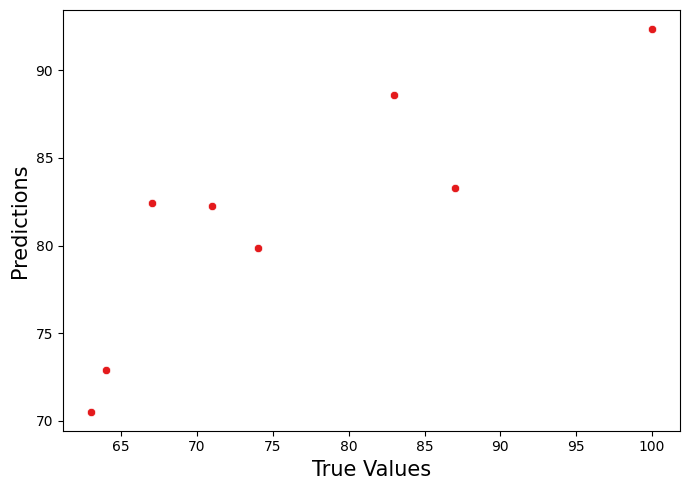





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=10) :


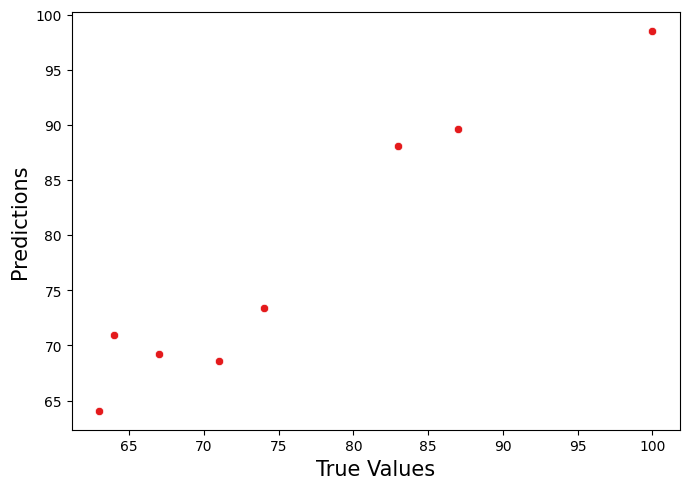





 True Values Vs Predicted Value plot Ridge(alpha=0.01) :


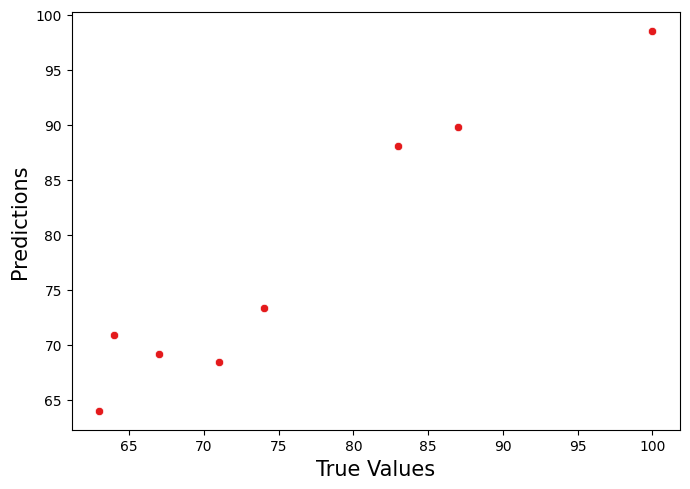





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


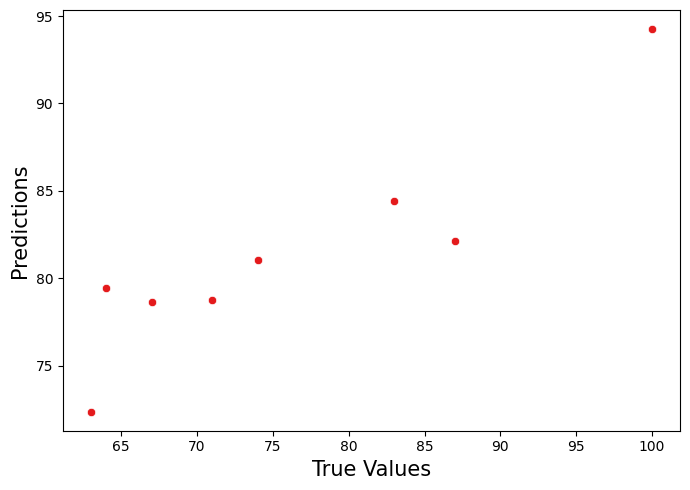





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


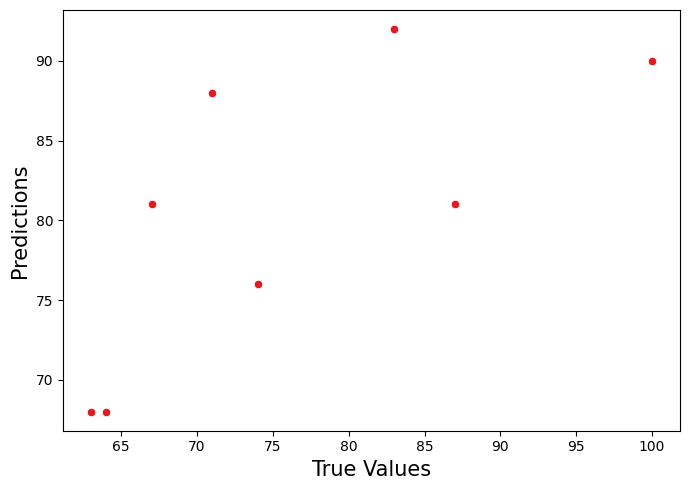





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


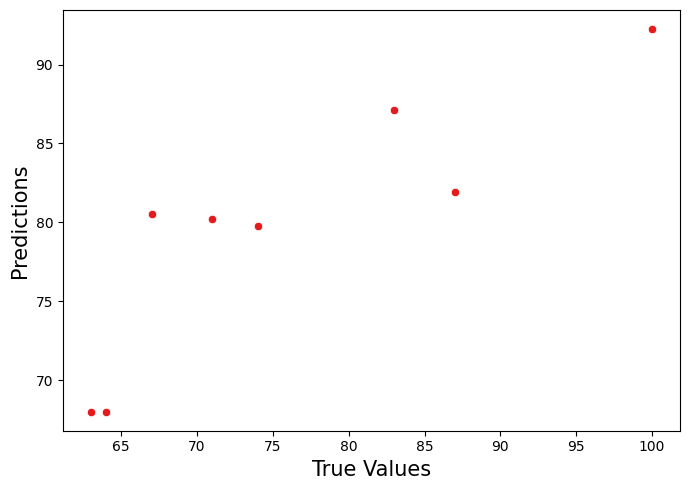





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


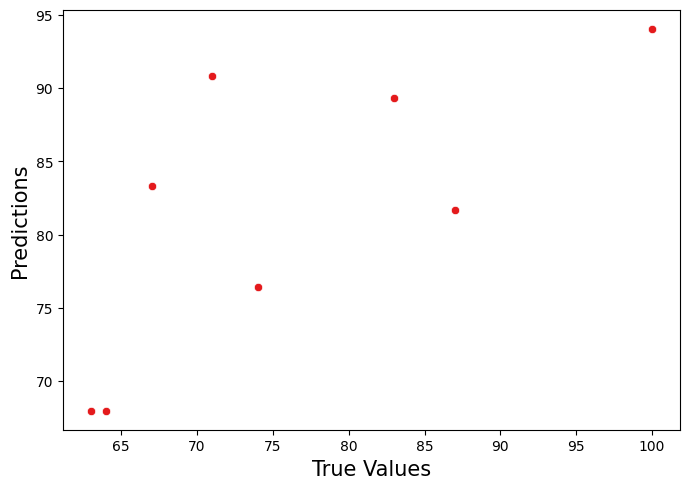





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


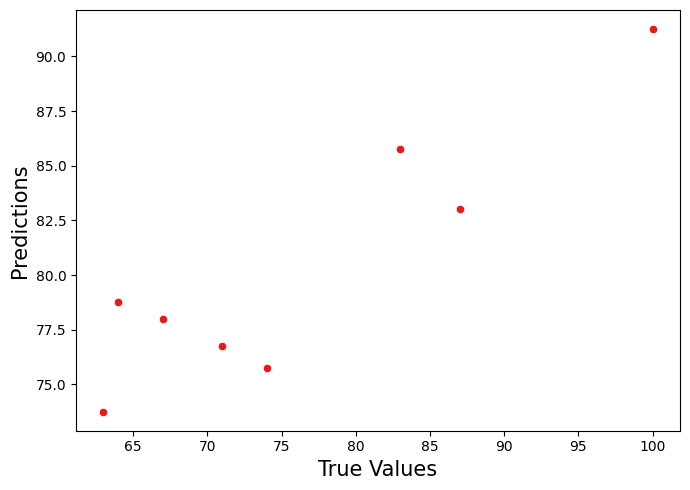





 True Values Vs Predicted Value plot XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) :


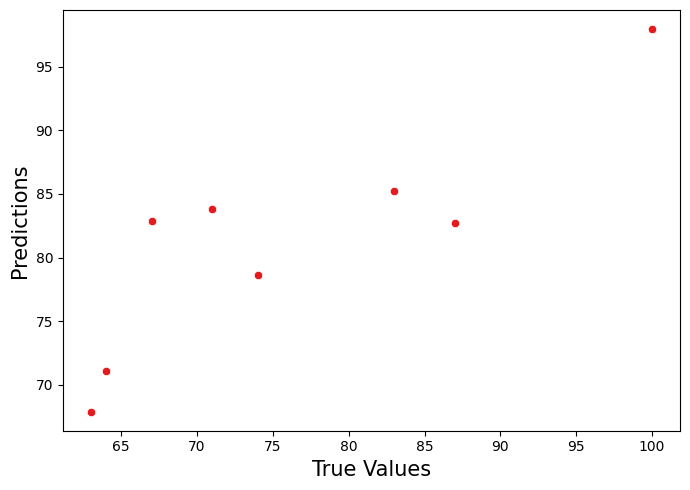

In [ ]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(x=Y_test, y=y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

### **Hyper Parameter Tuning : GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}


In [ ]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [ ]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 61,
 'selection': 'random'}

### **Final Model:**

In [ ]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True,max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 3.3095487792575273
Mean squared error : 15.648902884337407
Root Mean Squared Error: 3.9558694220534387


 R2 Score of Final Model :
0.8928959699927714




 True Values Vs Predicted Value plot :


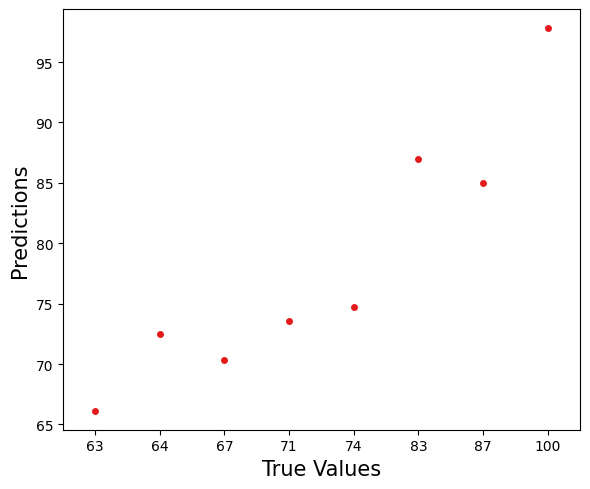

In [ ]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x= Y_test, y= y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### **Saving Model:**

In [ ]:
import joblib
joblib.dump(Final_mod,'Baseball_case_Final.pkl')

['Baseball_case_Final.pkl']

* __This concludes the Baseball Case Study evaluation project__

                    ***============================================The END============================================***